# AN OVERVIEW OF THE NUMPY.RANDOM PACKAGE IN PYTHON
### AUTHOR: ANTE DUJIC
<hr style="border:2px solid black"> </hr>

## INTRODUCTION
<hr style="border:2px solid gray"> </hr>

This notebook contains a detail overview of the *numpy.random* package in python. It is explained how to use the package, but it also includes a detailed explanations of simple random data, permutations and some of the distributions provided for in the package. The aim of this notebook is to simplify the mentioned module explanation given on the [Official NumPy Manual website](https://numpy.org/doc/stable/reference/random/index.html) and give a visual represantation of some of the functions contained within.

<center><img src="https://upload.wikimedia.org/wikipedia/commons/3/31/NumPy_logo_2020.svg" width="200"/></center> 

***
### CONTENTS

1. [NUMPY](#NUMPY)
    - 1.1. [INSTALLATION](#INSTALLATION)
    - 1.2. [IMPORT](#IMPORT)
2. [NUMPY.RANDOM](#NUMPY.RANDOM)
    - 2.1. [SEED](#SEED)
    - 2.2. [SIMPLE RANDOM DATA](#SIMPLE_RANDOM_DATA)
        - 2.2.1. [integers](#integers)
        - 2.2.2. [random](#random)
        - 2.2.3. [choice](#choice)
        - 2.2.4. [bytes](#bytes)
    - 2.3. [PERMUTATIONS](#PERMUTATIONS)
        - 2.3.1. [shuffle](#shuffle)
        - 2.3.2. [permutation](#permutation)
        - 2.3.4. [permuted](#permuted)
    - 2.4. [DISTRIBUTIONS](#DISTRIBUTIONS)
        - 2.4.1. [uniform](#uniform)
        - 2.4.2. [normal](#normal)
        - 2.4.3. [binomal](#binomal)
        - 2.4.4. [hypergeometric](#hypergeometric)
        - 2.4.5. [poisson](#poisson)
    
3. [FOR FUN](#FOR_FUN)
4. [REFERENCES](#REFERENCES)

## 1. NUMPY <a id='NUMPY'></a>
<hr style="border:2px solid gray"> </hr>

NumPy stands for Numerical Python and it is a core scientific computing library in Python. [1]. It is a provision for huge, multi-dimensional arrays and matrices, alongside an extra-large collection of high-level mathematical functions to work on these arrays. [2] It was created in 2005 by Travis Oliphant. It is an open source project, and the source code for NumPy is located at this github repository:  https://github.com/numpy/numpy. [3]


Image 1. Array shape
<center><img src="https://i.stack.imgur.com/NWTQH.png" width="500"/></center>

### 1.1. INSTALLATION <a id='INSTALLATION'></a>
***
There are multiple ways to have *NumPy* library installed on your system, but the easiest way is to use a python distribution that already has NumPy installed - e.g. [Anaconda](https://docs.anaconda.com/anaconda/install/index.html).

### 1.2. IMPORT <a id='IMPORT'></a>
***
*NumPy* library is imported same as any other python library, using *import* command at the start of the program. *NumPy* is usually imported using *np* alias, which is used later in the program when reffering to the package. To check the version of *NumPy* on the system type *numpy.version.version* in the terminal.

In [1]:
import numpy as np
np.version.version

'1.20.1'

#### OTHER LIBRARIES IN THIS NOTEBOOK

***Matplotlib*** - a plotting library for the Python programming language and its numerical mathematics extension NumPy. [4]

In [2]:
import matplotlib.pyplot as plt

***Seaborn*** - an open-source Python library built on top of matplotlib. It is used for data visualization and exploratory data analysis. [5]

In [3]:
import seaborn as sns

## 2. NUMPY.RANDOM <a id='NUMPY.RANDOM'></a>
<hr style="border:2px solid gray"> </hr>

A *random* is a module present in the *NumPy* library. This module contains the functions which are used for generating random numbers. [6] Random number does not mean a different number every time. Random means something that can not be predicted logically. [7] *Random* module is based on pseudo-random number generation that means it is a mathematical way that generates a sequence of nearly random numbers. It is a combination of a bit generator and a generator. In Python, the random values are produced by the generator and originate in a Bit generator.[8]

### 2.1. SEED <a id='SEED'></a>
***

A random seed (or seed state, or just seed) is a number (or vector) used to initialize a pseudorandom number generator. [9] It specifies the start point when a computer generates a random number sequence [10] and is generated by software using one or more values. Hardware information, time, or date are different examples of values that help generate a random value. [11] This is useful when the written code moves to production. But, if a pseudorandom number generator is reinitialized with the same seed, it will produce the same sequence of numbers. [9] It is useful for debugging purposes to use the same seed.

Since Numpy version 1.17.0 the Generator can be initialized with a number of different BitGenerators. The Generator is the user-facing object that is nearly identical to the legacy RandomState. The main difference is that the Generator uses bits provided by PCG64 which has better statistical properties than the legacy MT19937 used in RandomState. [12] <br> MT19937 is an implementation of Mersenne Twister pseudo random number generator, developed in 1997 by Makoto Matsumoto and Takuji Nishimura. MT19937, uses a 32-bit word length. There is another implementation that uses a 64-bit word length, MT19937-64.[13] <br> PCG (Permuted Congruential Generator) is a family of simple fast space-efficient statistically good algorithms for random number generation. Unlike many general-purpose RNGs, they are also hard to predict. [14] PCG-64 is a 128-bit implementation of O’Neill’s permutation congruential generator. [15] <br> The legacy RandomState random number routines are still available, but limited to a single BitGenerator. [12] Some of the [differences](https://numpy.org/doc/stable/reference/random/new-or-different.html) between the two are shown on an image below.

Image 1. Difference between PCG and MT

<center>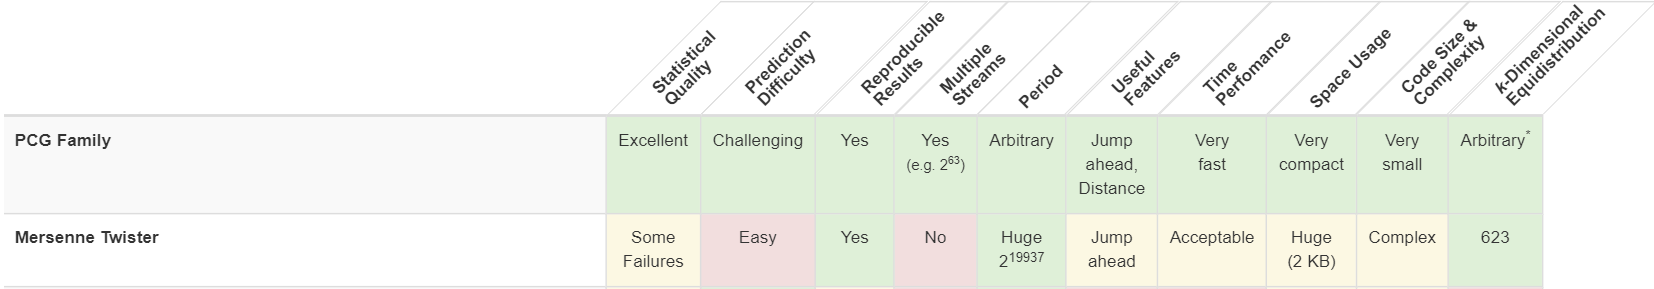</center>

<br>
<br>

Call *default_rng* to get a new instance of a Generator, then call its methods to obtain samples from different distributions. [12] Some of the methods are described further in this notebook.

In [4]:
rng = np.random.default_rng()
print (rng)

Generator(PCG64)


### 2.2. SIMPLE RANDOM DATA <a id='SIMPLE_RANDOM_DATA'></a>

There are four methods to generate simple random data in current Numpy version: *integers*, *random*, *choice* and *byte*. Each is described below.
***

#### 2.2.1. [**integers**](https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.integers.html#numpy.random.Generator.integers) (low, high=None, size=None, dtype=np.int64, endpoint=False) <a id='integers'></a>

Returns random integers in the specified range. ***low*** refers to the start of the range and it's inclusive. ***high*** is the end of the range and is by the default exclusive (end of range = *high* - 1). To inlcude *high* in the range, ***endpoint***, which is *False* by default, has to be set up as *True*. If *high* is not specified then *low* is used as the end of the range. ***size*** defines the shape of the output and it can be one or multi-dimensional. ***dtype*** defines the dtype of the output, and it is *np.int64* by default. *Integers* returns radnom integers in "discrete uniform" distribution. A discrete uniform distribution is a statistical distribution where the probability of outcomes is equally likely and with finite values. [16]

##### EXAMPLES:
***

UNIFORM DISTRIBUTION OF RANDOM INTEGERS 10 - 1000000 (exclusive)

Integers: [98 90 47 ... 61 14 71] 



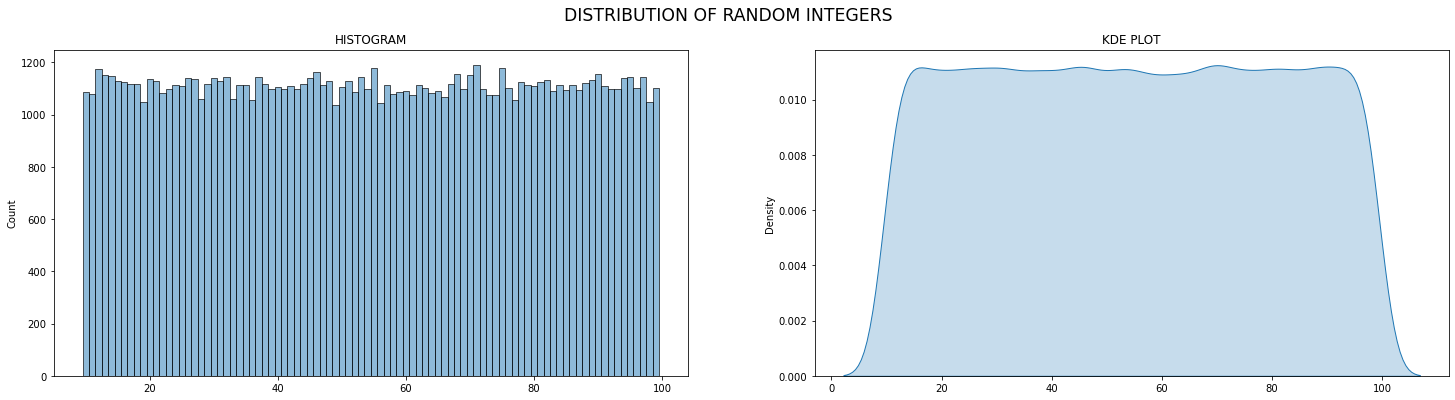

In [66]:
x_int = (rng.integers(10, 100, size=100000))
print ("Integers:", x_int, "\n")

fig, axs = plt.subplots(1, 2, figsize = (25,6))
fig.suptitle ("DISTRIBUTION OF RANDOM INTEGERS", size = "xx-large")
sns.histplot (x_int, discrete = True, alpha = 0.5, ax = axs[0]).set_title("HISTOGRAM")
sns.kdeplot(x_int, shade=True, ax = axs[1]).set_title("KDE PLOT")
plt.show()

| EXPLANATION |
| :-: | 
| It is visible in both histogram and KDE plot that *integer* function returns random integers in uniform distribution. |                                                                                     

***

RANDOM INTEGERS 0 - 5 (inclusive and exclusive)

 Integers (0-5]: [2 1 1 3 1 1 0 4 1 2 3 1 2 0 4 0 2 2 2 3 3 0 4 4 1 3 2 4 3 4 3 1 1 3 0 1 0
 0 3 2 4 2 2 0 0 4 3 4 0 0 0 0 2 1 1 3 3 0 1 3 3 1 0 2 0 0 4 1 1 4 2 2 4 0
 1 0 1 0 2 2 3 0 0 0 4 0 2 4 1 3 4 1 2 2 1 0 2 4 2 3] 

 Integers (0,5): [1 5 2 4 3 1 0 5 2 2 5 2 5 4 3 0 3 3 5 5 5 5 2 5 1 5 0 0 2 0 0 3 0 0 2 2 3
 4 1 3 0 1 3 2 4 1 2 3 3 5 2 1 0 3 5 2 2 3 2 1 4 5 3 0 5 3 1 3 4 2 0 4 2 4
 5 3 4 1 3 0 4 5 1 1 4 4 1 2 0 5 2 2 5 1 5 1 4 3 3 2]


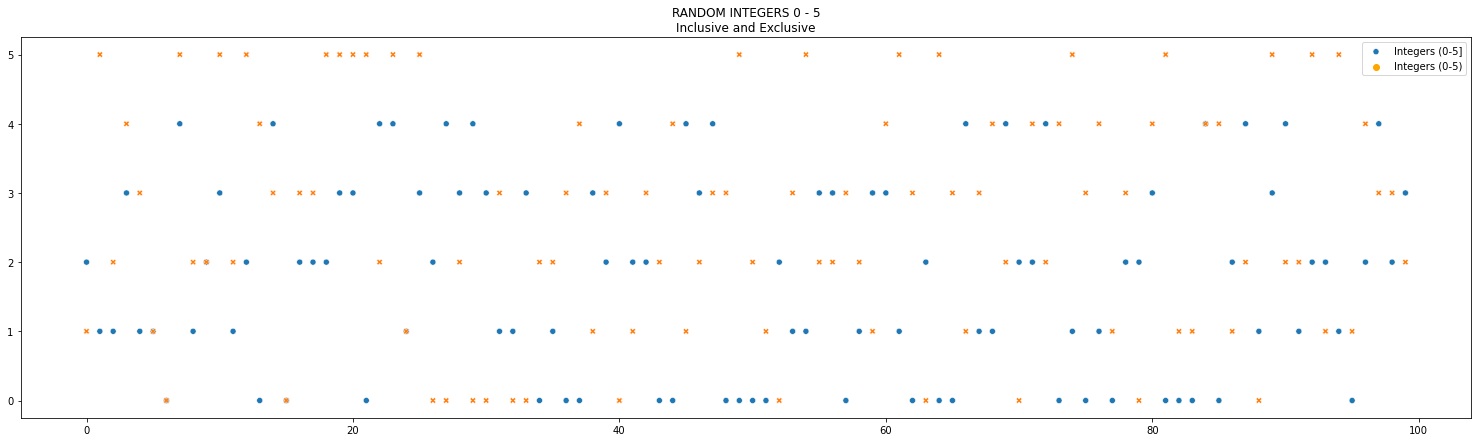

In [70]:
x1_int = (rng.integers(5, size=100))
x2_int = (rng.integers(5, size=100, endpoint = True))
print (" Integers (0-5]:", x1_int,"\n\n", "Integers (0,5):", x2_int)

fig, axs = plt.subplots(figsize = (26,7))
sns.scatterplot (data = [x1_int,x2_int]).set_title ("RANDOM INTEGERS 0 - 5\nInclusive and Exclusive")
plt.legend(["Integers (0-5]", "Integers (0-5)"])
ax = plt.gca()
leg = ax.get_legend()
leg.legendHandles[1].set_color('orange')
plt.show()

| EXPLANATION |
| :-: | 
| This scatterplot gives a visual represantation of the random integers, both with inclusive and exclusive endpoints. Both random lists have the same *low* value, but *endpoint* is set to *True* on one. It is clearly visible that the one with the *endpoint = True* is the one with orange markers. | 

***

RANDOM INTEGERS 0 - 10 (exclusive) - 2D ARRAY

2D Array:
 [[3 8 5 9 4 4 5 4 8 9 0 0 6 9 5 7 2 3 3 1 5 8 9 9 9 9 2 0 5 7]
 [5 3 1 8 5 7 3 6 2 7 3 3 8 5 2 1 8 7 3 7 4 0 7 6 5 2 4 0 9 6]
 [1 3 6 6 7 5 6 9 3 8 7 6 4 1 0 8 6 8 3 4 4 9 2 4 9 2 1 5 8 3]
 [3 6 1 8 2 9 1 5 4 4 4 6 3 7 4 0 6 1 1 8 8 9 0 4 1 2 1 9 7 9]
 [3 1 1 9 8 0 0 0 9 4 2 8 6 9 7 9 5 6 3 6 8 3 4 1 7 8 3 0 8 2]
 [8 2 5 5 4 3 0 9 0 4 5 3 5 1 2 4 2 6 5 2 6 2 0 4 5 5 4 0 0 0]
 [5 9 0 6 3 0 9 5 9 9 2 7 6 7 5 7 8 7 0 1 7 4 5 1 5 9 5 3 3 0]
 [9 6 4 1 5 0 2 2 9 8 4 7 2 2 0 5 2 7 0 2 2 4 6 8 7 2 0 3 1 2]
 [5 1 2 0 8 0 9 3 6 6 2 8 6 6 0 4 1 0 4 6 1 1 1 5 7 3 0 2 0 8]
 [2 5 6 9 7 8 0 8 2 8 2 8 7 4 5 7 7 2 4 7 4 0 3 6 5 8 3 7 7 7]] 



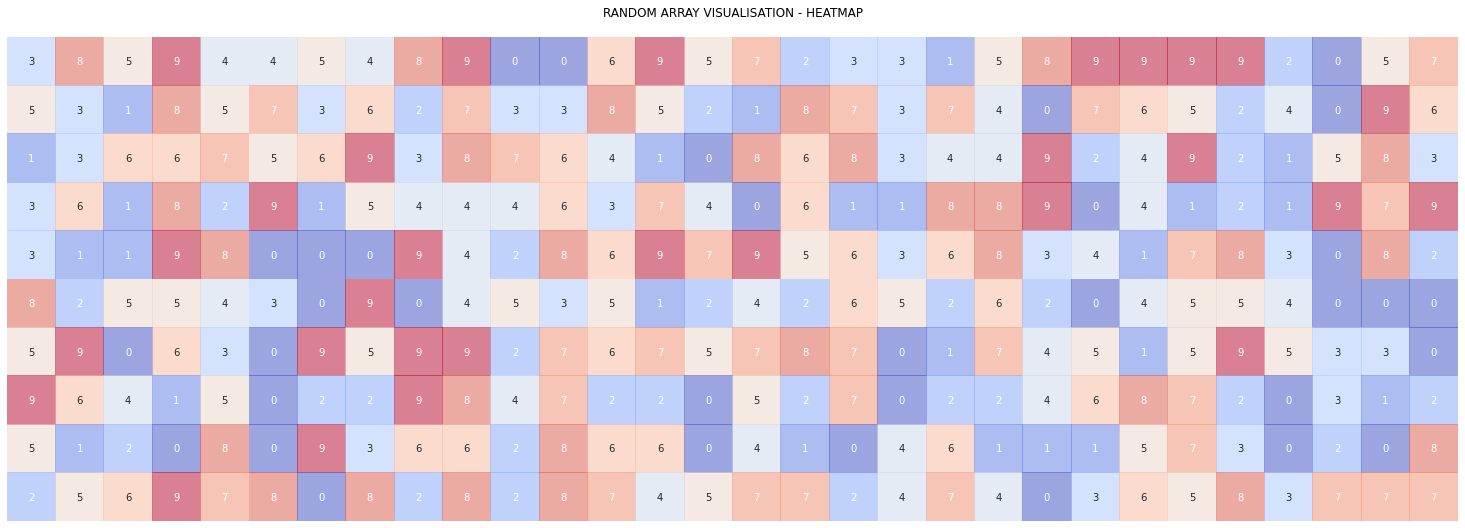

In [101]:
x3_int = (rng.integers(10, size=(10, 30)))
print ("2D Array:\n", x3_int, "\n")
fig, axs = plt.subplots(figsize = (26,10))
sns.heatmap (data = x3_int, square = True, annot = True, cmap = "coolwarm", alpha = 0.5, cbar=False).set_title("RANDOM ARRAY VISUALISATION - HEATMAP\n")
plt.xticks([])
plt.yticks([])
plt.show()

| EXPLANATION |
| :-: | 
| This heatmap serves as a visual represantation of a 2D random array (10 x 30). If code gets run multiple times, it is clearly visible how the colored blocks change their place. | 

***

ARRAY WITH THREE DIFFERENT *high* VALUES

***

In [9]:
x5_int = (rng.integers(1, [10, 50, 100]))
print (x5_int)

[6 5 1]


***

ARRAY WITH THREE DIFFERENT *low* VALUES

In [10]:
x6_int = (rng.integers([1, 50, 90], 100))
print (x6_int)

[30 81 93]


***

RANDOM INTEGERS 0 - 10 (exclusive) - 3D ARRAY

3D Array:
x =
 [[4 4 0 5 1]
 [3 1 7 2 0]
 [0 0 4 4 3]
 [0 1 8 4 1]
 [2 7 1 7 0]]
y =
 [[1 5 1 8 2]
 [9 1 2 1 6]
 [7 9 6 4 9]
 [0 1 1 9 4]
 [2 0 4 5 2]]
z =
 [[1 5 7 4 4]
 [3 0 1 3 5]
 [5 4 4 3 1]
 [7 4 4 5 6]
 [7 6 1 2 4]]


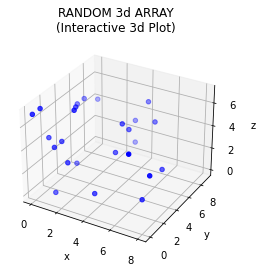

In [74]:
#from mpl_toolkits.mplot3d import Axes3D
#%matplotlib widget
#%matplotlib notebook
#%matplotlib ipympl

x4_int, y4_int, z4_int = (rng.integers(10, size=(3,5,5)))
print ("3D Array:")
print ("x =\n", x4_int)
print ("y =\n", y4_int)
print ("z =\n", z4_int)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
plt.title("RANDOM 3d ARRAY\n(Interactive 3d Plot)")
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.scatter (x4_int, y4_int, z4_int, c= 'blue')
plt.show()
# %matplotlib inline

| EXPLANATION |
| :-: | 
| This 3D plot shows randomly generated integers in 3D space. x, y and z axis are generated randomly using *integer* function. If code gets run multiple times, we can see how markers move in the 3D space. | 

***

#### 2.2.2. [**random**](https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.random.html#numpy.random.Generator.random)(size=None, dtype=np.float64, out=None) <a id='random'></a>

Returns random floats in the interval higher or equal to 0.0 and less then 1.0. This interval is called half-open interval, where one of the endpoints are inclusive. ***size*** defines the output shape, which, if not specified, is none - single value is returned. ***dtype*** defines the dtype of the output and is *np.float64* by the default. Only *float64* and *float32* are supported. ***out*** is alternative output array in which to place the result. *return* module can also be used for custom half-open intervals, e.g. if we want the output of a radnom float between a and b, we can do the following:
> (b - a) * random() + a

The outputs are from the “continuous uniform” distribution. A continuous uniform distribution (also referred to as rectangular distribution) is a statistical distribution with an infinite number of equally likely measurable values. [16]

##### EXAMPLES:
***

In [11]:
x0_rand = rng.random()
print (x0_rand)

0.23463916776222904


***

UNIFORM DISTRIBUTION OF RANDOM FLOATS IN HALF OPEN INTERVAL [0,10)

Floats: [0.29968094 0.22986714 0.83914354 ... 0.25845282 0.25800821 0.06562169] 



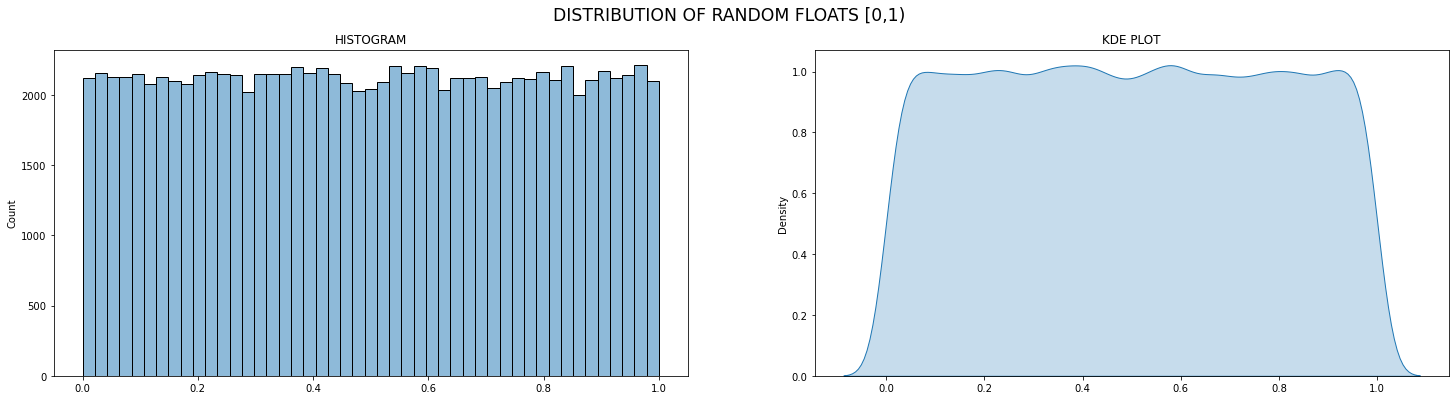

In [73]:
x_rand = (rng.random (100000))
print ("Floats:", x_rand, "\n")

fig, axs = plt.subplots(1, 2, figsize = (25,6))
fig.suptitle ("DISTRIBUTION OF RANDOM FLOATS [0,1)\n", size = "xx-large")
sns.histplot (x_rand, alpha = 0.5, ax = axs[0]).set_title("HISTOGRAM")
sns.kdeplot(x_rand, shade=True, ax = axs[1]).set_title("KDE PLOT")
plt.show()

| EXPLANATION |
| :-: | 
| Both histogram and KDE plot shows that *random* function returns random floats in uniform distribution. The higher the *size* value, the mentioned is clearer. It is also visible that returned floats are in the interval higher or equal to 0.0 and less then 1.0.|                                                                                     

***

RANDOM FLOATS (0, 1]

2D Array [0-1):
 [[0.05380148 0.63712873 0.75859741 0.71369521 0.22648664]
 [0.97648302 0.02632667 0.04393273 0.20449653 0.18846696]
 [0.07658444 0.18970526 0.14067933 0.80129496 0.66523354]
 [0.79539464 0.23677517 0.47770068 0.04828738 0.61586119]
 [0.65542105 0.86813889 0.96249043 0.95663956 0.6764708 ]] 

2D Array [50-100)):
 [[92.23133459 94.03115873 63.8314204  54.36290287 98.51729035]
 [88.78803192 90.86182626 87.25699796 90.81508833 86.36485437]
 [59.01785969 76.45007863 67.80669957 80.77725812 53.96078583]
 [54.14129055 76.51520909 73.74535469 81.41224609 87.68920311]
 [58.71027726 88.64367449 67.30961271 71.18086409 92.60971246]] 



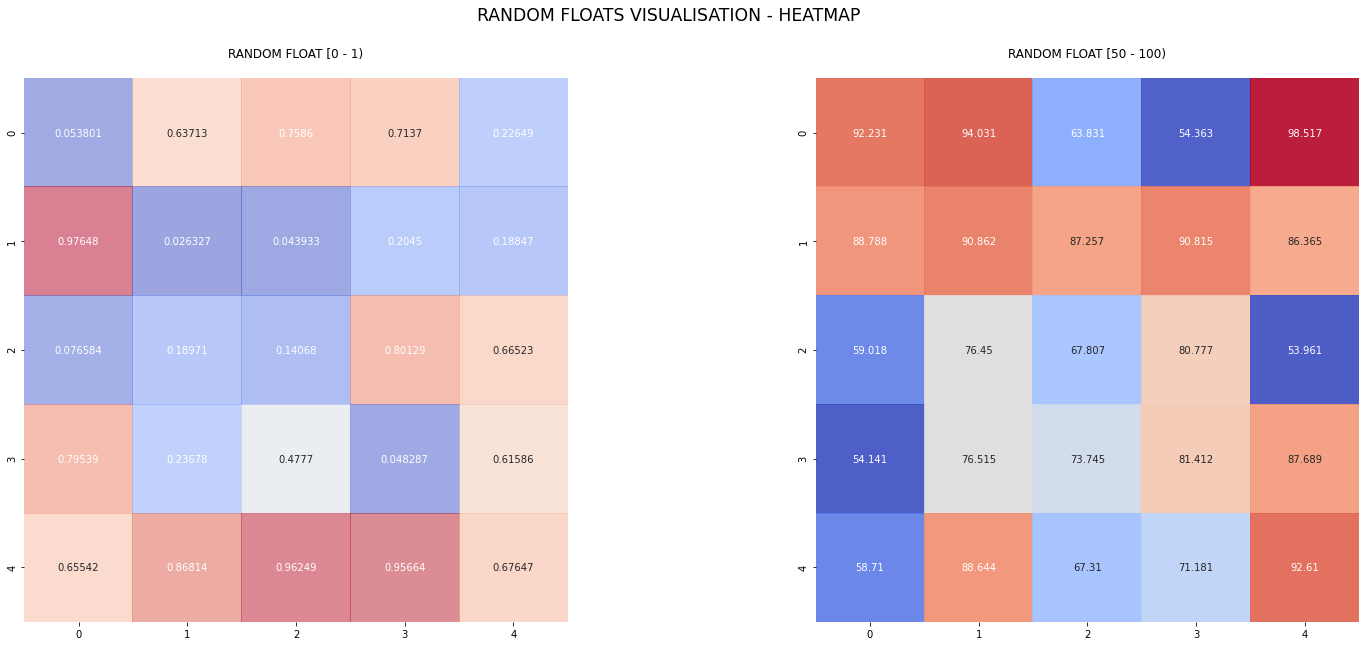

In [94]:
x1_rand = rng.random([5, 5])
print("2D Array [0-1):\n", x1_rand, "\n")
x2_rand = ((100-50) * rng.random((5, 5)) + 50)
print("2D Array [50-100)):\n", x2_rand,"\n")

fig, axs = plt.subplots(1, 2, figsize = (26,10))
fig.suptitle ("RANDOM FLOATS VISUALISATION - HEATMAP", size = "xx-large")
sns.heatmap (data = x1_rand, square = True, annot = True, fmt='.5g', cmap = "coolwarm",
             alpha = 0.5, ax = axs[0], cbar=False).set_title("RANDOM FLOAT [0 - 1)\n")
sns.heatmap (data = x2_rand, square = True, annot = True, fmt='.5g', cmap = "coolwarm",
             alpha = 0.9, ax = axs[1], cbar=False).set_title("RANDOM FLOAT [50 - 100)\n")

plt.show()

| EXPLANATION |
| :-: | 
| The heatmaps give a visual represantation of two 2D random arrays (5x5). One heatmap doesn't have the range specified and the return are the floats in range [0 - 1). The second heatmap has a specified range, using formula: (b - a) * random() + a. If code is run multiple times, the square representing numbers will change the color and place.| 

***

#### 2.2.3. [**choice**](https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.choice.html#numpy.random.Generator.choice) (a, size=None, replace=True, p=None, axis=0, shuffle=True) <a id='choice'></a>

Generates a random sample from a given array. ***a*** sets the range from which the radnom sample gets generated. If *a* is an ndarray, the output is random selection of the elements of that array. If *a* is an integer, the output is random selection of a range from 0 - given integer (exclusive). ***size*** defines the shape of the output. It is *None* by default. If *a* has more than one dimension, the size shape will be inserted into the axis dimension. ***replace*** defines if the return will have repeated elements. It is *True* by default, meaning that a value of *a* can be selected multiple times. ***p*** is the probability of the entries in *a* to be selected. By default it is *None*, meaning the probibility is equal for all - uniform distribution. ***axis*** is axis along which the selection is performed, and is *0* by default. ***shuffle*** defines if the output is shuffled when sampling without replacement. Default is *True*.

<br>

Image 1. Axes
<center><img src="https://i.stack.imgur.com/dcoE3.jpg" width="500"/></center>

EXAMPLES:
***

INTEGER CHOSEN IN RANGE [0 - 100)

In [14]:
x0_ch = rng.choice (100)
print (x0_ch)

75


***

UNIFORM DISTRIBUTION OF RANDOM INTEGERS CHOSEN IN RANGE [0 - 50)

Integers: [ 3 44 20 ...  3 37  2] 



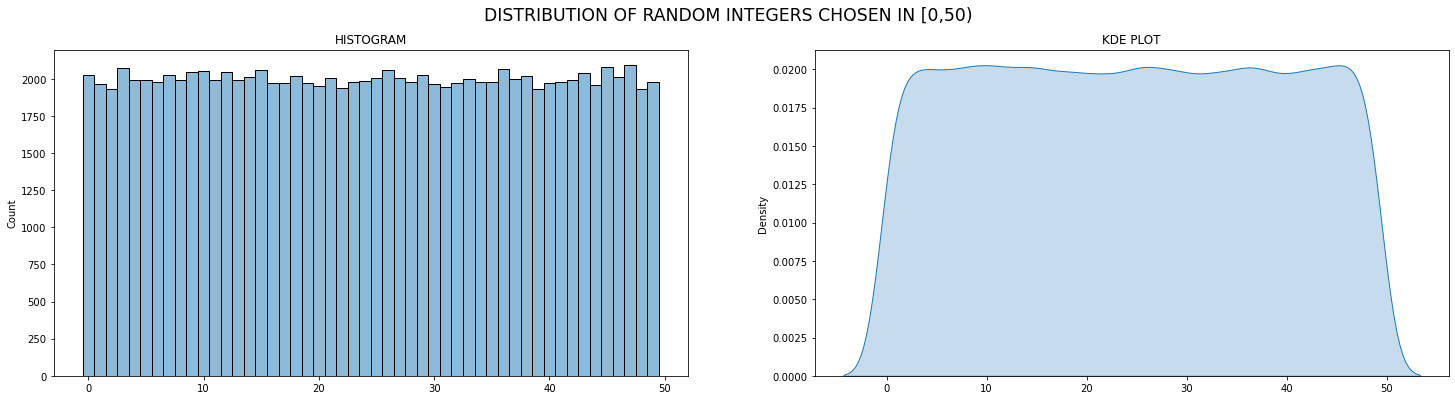

In [15]:
x_ch = (rng.choice(50,100000))
print ("Integers:", x_ch, "\n")

fig, axs = plt.subplots(1, 2, figsize = (25,6))
fig.suptitle ("DISTRIBUTION OF RANDOM INTEGERS CHOSEN IN [0,50)\n", size = "xx-large")
sns.histplot (x_ch, discrete = True, alpha = 0.5, ax = axs[0]).set_title("HISTOGRAM")
sns.kdeplot(x_ch, shade=True, ax = axs[1]).set_title("KDE PLOT")
plt.show()

| EXPLANATION |
| :-: | 
| Histogram and KDE plot shows that *choice* function returns randomly chosen elements from a given array in uniform distribution. This means that the probibility that any of the given elements will be chosen is equal. |                                                                                   

***

DISTRIBUTION OF RANDOM CHOSEN INTEGERS [1,3,5,7] WITH SET PROBABILITY

Integers: [3 1 5 ... 7 3 3] 



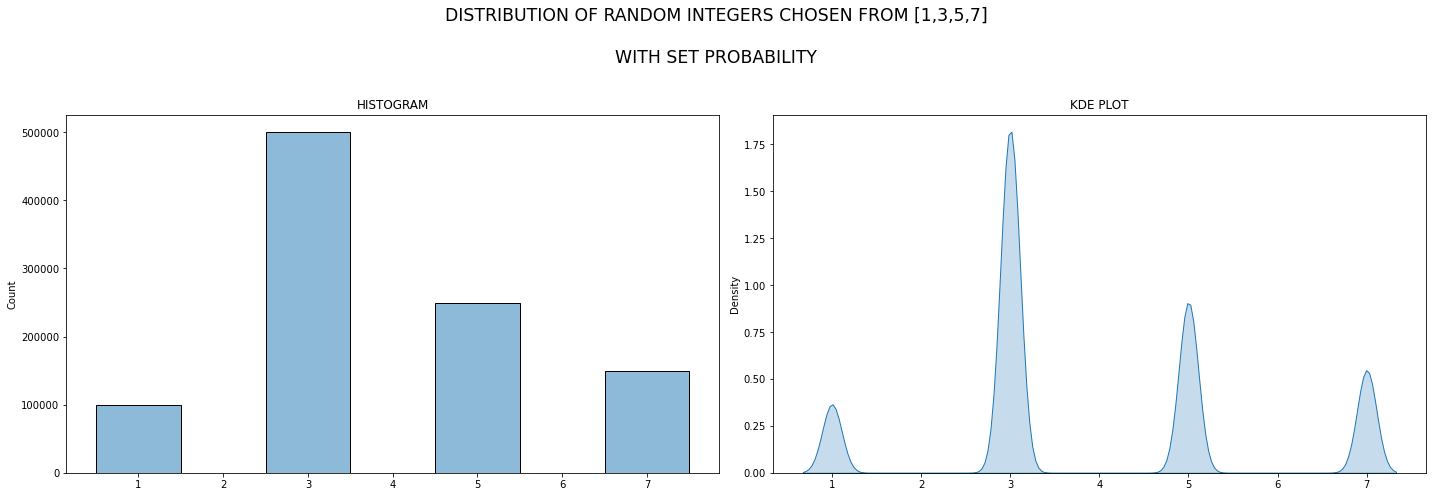

In [16]:
x1_ch = (rng.choice([1,3,5,7], 1000000, p=[0.1, 0.5, 0.25, 0.15]))
print ("Integers:", x1_ch, "\n")

fig, axs = plt.subplots(1, 2, figsize = (20,7))
fig.suptitle ("DISTRIBUTION OF RANDOM INTEGERS CHOSEN FROM [1,3,5,7]\n\nWITH SET PROBABILITY\n", size = "xx-large")
sns.histplot (x1_ch, discrete = True, alpha = 0.5, ax = axs[0]).set_title("HISTOGRAM")
sns.kdeplot(x1_ch, shade=True, ax = axs[1]).set_title("KDE PLOT")
plt.tight_layout()
plt.show()

| EXPLANATION |
| :-: | 
| The above histogram and KDE plot shows that the probibility in the *choice* function can be altered. By setting *p* we can give certain elements higher chance to be chosen. It is clearly visible how in this case number 3 has the highest probability 0.5, followed by number 5 with probibility 0.25, followed by number 7 with probibility 0.15 and finally number 1 which has the smallest probibility 0.1. |                                                                                   

***

Integers: [5 8 4 5 7 6 4 8 3 0] 

Integers: [8 9 5 2 4 6 1 3 0 7] 



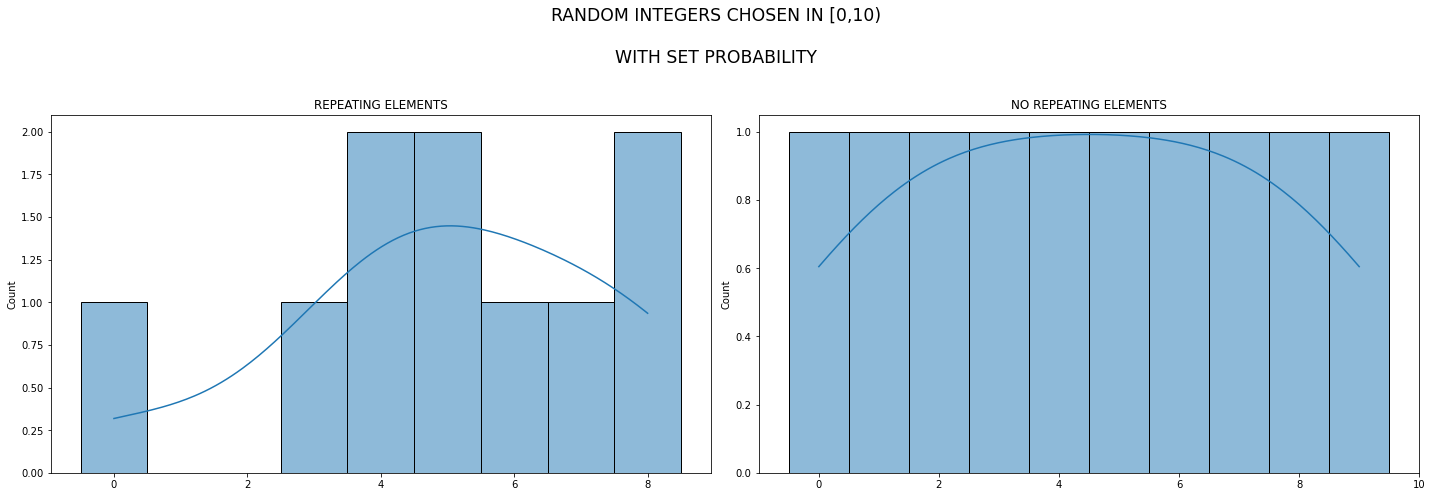

In [17]:
x2_ch = (rng.choice(10, 10))
print("Integers:", x2_ch, "\n")
x3_ch = (rng.choice(10,10, replace=False))
print("Integers:", x3_ch, "\n")


fig, axs = plt.subplots(1, 2, figsize = (20,7))
fig.suptitle ("RANDOM INTEGERS CHOSEN IN [0,10)\n\nWITH SET PROBABILITY\n", size = "xx-large")
sns.histplot (x2_ch, discrete = True, alpha = 0.5, ax = axs[0], kde = True).set_title("REPEATING ELEMENTS")
sns.histplot (x3_ch, discrete = True, alpha = 0.5, ax = axs[1], kde = True).set_title("NO REPEATING ELEMENTS")
plt.tight_layout()
plt.show()

| EXPLANATION |
| :-: | 
| The two histograms and KDE plots show the result of setting *repeat* to *False*. Left plot represents the default setting, where *repeat* is *True*. It is visible how certain bars are higher and other lower (non existing), showing how some numbers get repeted or don't get returned at all. The plot on the right has *repeat* set to *False* and there are no repeating elements. They are all returned once only. |                                                                                   

***

2D Array:
 [[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]
 [15 16 17 18 19]
 [20 21 22 23 24]] 

2D Array - shuffled:
 [[ 5  2  3 22 17]
 [ 9  6 15  0 12]
 [13 18  7 11 19]
 [ 1 24 20 23  4]
 [16 10  8 21 14]] 



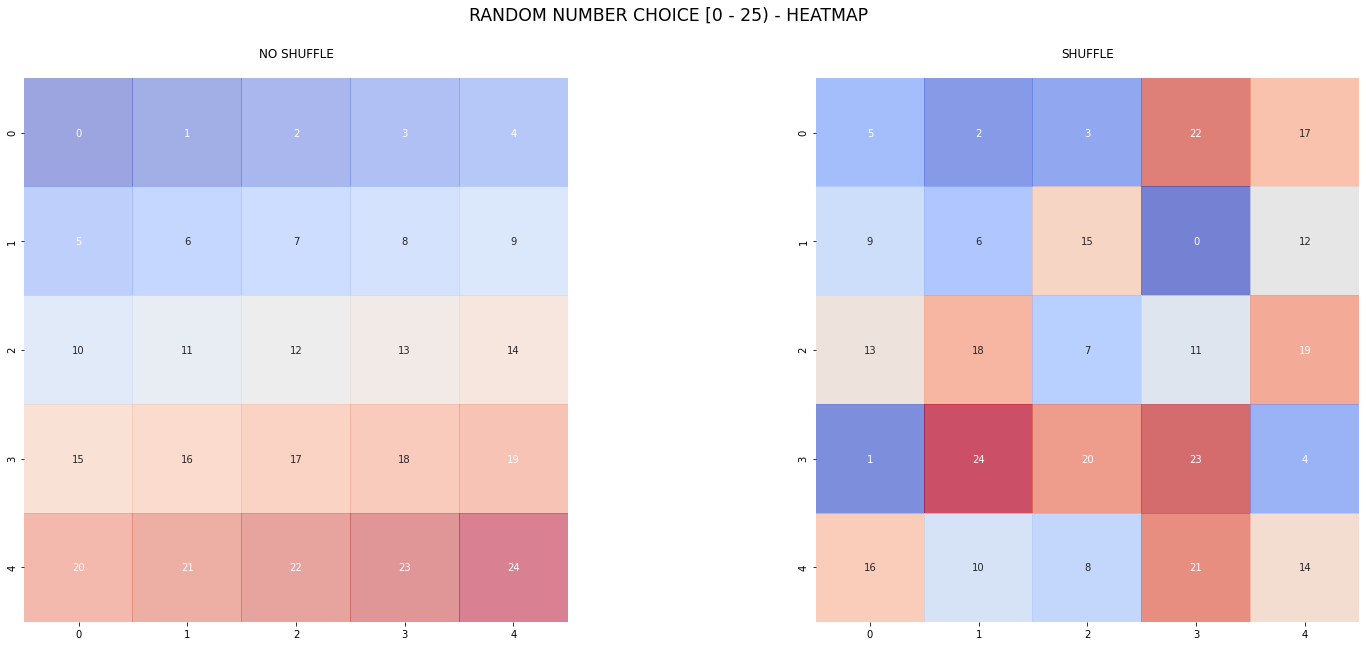

In [105]:
x3_ch = (rng.choice (25,(5,5), replace = False, shuffle = False))
print("2D Array:\n", x3_ch, "\n")
x4_ch = (rng.choice (25,(5,5), replace = False, shuffle = True))
print("2D Array - shuffled:\n", x4_ch, "\n")


fig, axs = plt.subplots(1, 2, figsize = (26,10))
fig.suptitle ("RANDOM NUMBER CHOICE [0 - 25) - HEATMAP", size = "xx-large")
sns.heatmap (data = x3_ch, square = True, annot = True, cmap = "coolwarm",
             alpha = 0.5, ax = axs[0], cbar=False).set_title("NO SHUFFLE\n")
sns.heatmap (data = x4_ch, square = True, annot = True, cmap = "coolwarm",
             alpha = 0.7, ax = axs[1], cbar=False).set_title("SHUFFLE\n")
plt.show()

| EXPLANATION |
| :-: | 
| *choice* function allows for return to be shuffled when sampling without replacement. It is represented on the heatmaps above. The left heatmap represents 25 chosen elements from an array in a range [0-25). Right heatmap represents that array being shuffled, when *shuffle* is set to *True*. 

***

Integers 0: [0 1 2 3 4 5 6 7 8 9] 

Integers 1: [0 1 3 8 4 2 9 5 6 7] 

Integers 2: [8 5 9 9 0 2 4 7 7 9 7 7 7 7 1] 

Integers 3: [4 6 0 4 9 2 8 7 9 1 7 4 7 9 9] 



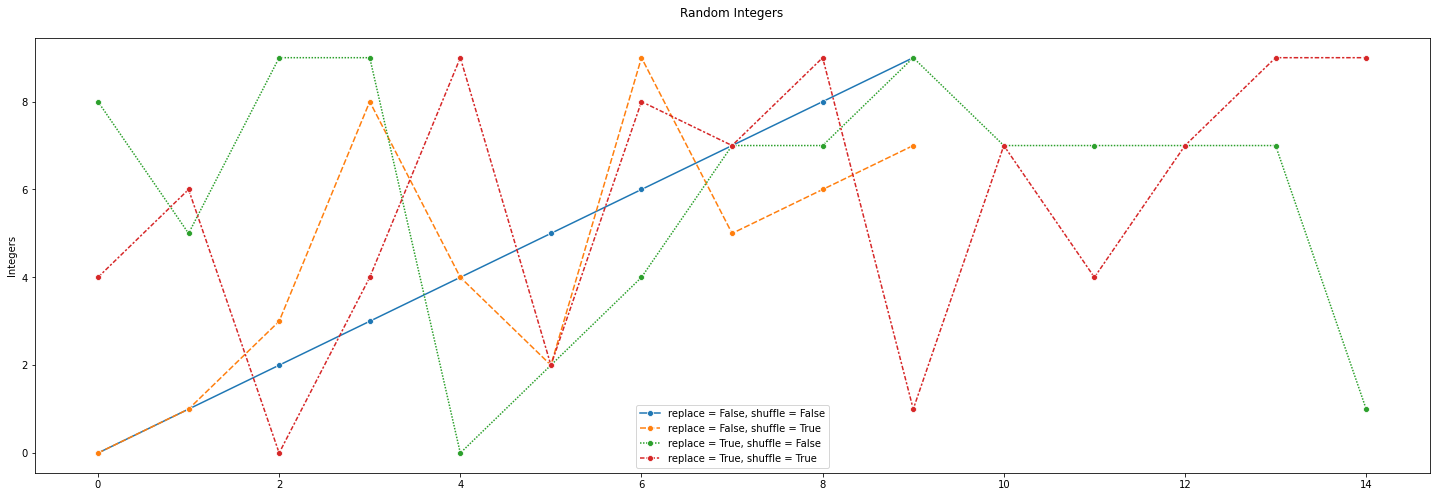

In [104]:
x5_ch = (rng.choice (10,10, replace = False, shuffle = False))
print("Integers 0:", x5_ch, "\n")
x6_ch = (rng.choice (10,10, replace = False))
print("Integers 1:", x6_ch, "\n")
x7_ch = (rng.choice (10,15, shuffle = False))
print("Integers 2:", x7_ch, "\n")
x8_ch = (rng.choice (10,15))
print("Integers 3:", x8_ch, "\n")

fig, axs = plt.subplots(figsize = (25,8))
sns.lineplot (data = [x5_ch, x6_ch, x7_ch, x8_ch], marker = "o")
plt.title ("Random Integers\n")
plt.ylabel("Integers")
plt.legend(["replace = False, shuffle = False","replace = False, shuffle = True",
           "replace = True, shuffle = False","replace = True, shuffle = True"])
plt.show()

| EXPLANATION |
| :-: | 
| This lineplot show 4 different combinations with *replace* and *shuffle* being either set to *True* or *False*. Integers 0 are the integers chosen with no repeating elements and without being shuffled. Integers 1 also has no repeating elements but is shuffled. Integers 2 has repeating elements and is not shuffled and finally Integers 3 has both repeating elements and they are being shuffled. |                                                                                  

***

UNIFORM RANDOM SAMPLE FROM AN ARRAY

In [21]:
x11_ch = rng.choice([[0, 1, 2], [3, 4, 5], [6, 7, 8]], 4, replace=True)
print (x11_ch)

[[0 1 2]
 [0 1 2]
 [3 4 5]
 [0 1 2]]


***

Original array:
 [[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]
 [15 16 17 18 19]
 [20 21 22 23 24]] 

Array - row:
 [[10 11 12 13 14]
 [ 5  6  7  8  9]
 [15 16 17 18 19]
 [20 21 22 23 24]
 [ 0  1  2  3  4]] 

Array - column:
 [[ 4  0  2  1  3]
 [ 9  5  7  6  8]
 [14 10 12 11 13]
 [19 15 17 16 18]
 [24 20 22 21 23]]


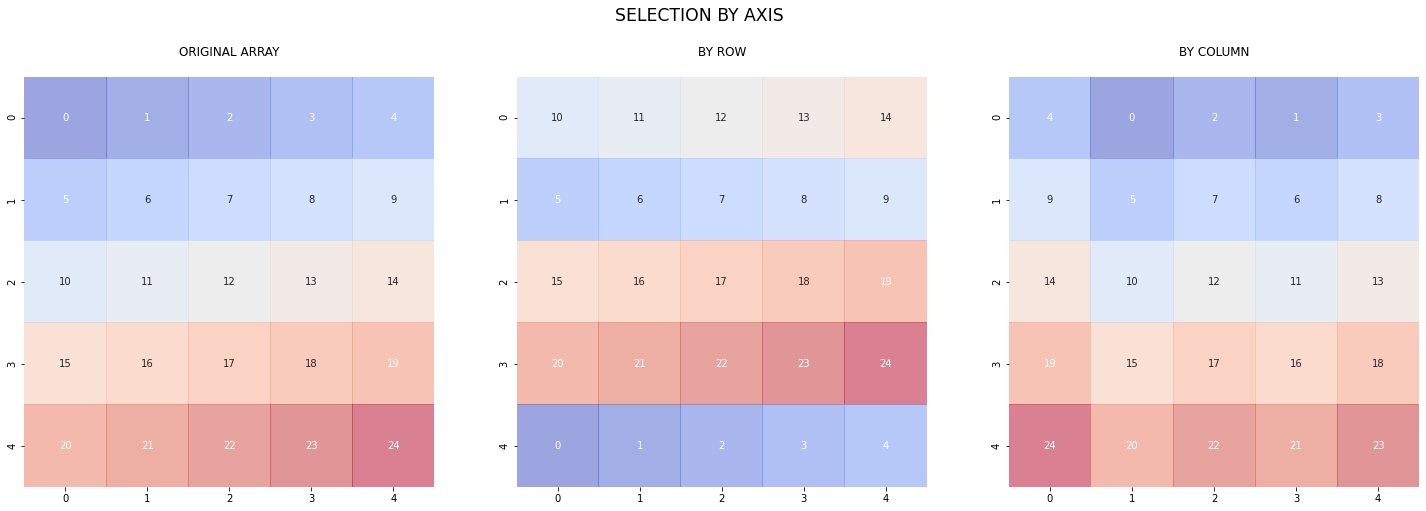

In [106]:
arr_ch = np.arange(25).reshape(5,5)
print("Original array:\n", arr_ch, "\n")
x9_ch = (rng.choice (arr_ch, 5, axis = 0, replace = False))
print("Array - row:\n", x9_ch, "\n")
x10_ch = (rng.choice (arr_ch, 5, axis = 1, replace = False))
print("Array - column:\n", x10_ch)

fig, axs = plt.subplots(1, 3, figsize = (25,8))
fig.suptitle ("SELECTION BY AXIS", size = "xx-large")
sns.heatmap (data = arr_ch, square = True, annot = True, cmap = "coolwarm",
             alpha = 0.5, ax = axs[0], cbar=False).set_title("ORIGINAL ARRAY\n")
sns.heatmap (data = x9_ch, square = True, annot = True, cmap = "coolwarm",
             alpha = 0.5, ax = axs[1], cbar=False).set_title("BY ROW\n")
sns.heatmap (data = x10_ch, square = True, annot = True, cmap = "coolwarm",
             alpha = 0.5, ax = axs[2], cbar=False).set_title("BY COLUMN\n")
plt.show()

| EXPLANATION |
| :-: | 
| The heatmaps above show the selection by different axes in a 2D array. First heatmap shows the array from which the selection is performed. Second heatmap shows the selection by row, where *axis* is *0* (default). The last heatmap shows the selection by column and the *axis* is set to *1*. |                                                                                  

***

RANDOM SAMPLE FROM A NON-INTEGER ELEMENTS

In [22]:
colors = ['red', 'blue', 'yellow', 'black']
x12_ch = rng.choice(colors, 10, p=[0.5, 0.1, 0.1, 0.3])
print (x12_ch)

['red' 'black' 'yellow' 'red' 'red' 'blue' 'red' 'red' 'black' 'black']


***

#### 2.2.4. [**bytes**](https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.bytes.html#numpy.random.Generator.bytes) (length) <a id='bytes'></a>

Genarates random bytes. The number of bytes is defined by ***length***.

EXAMPLES:
***

In [23]:
x_byte = rng.bytes(1)
print (x_byte)

b'\x8f'


***

In [24]:
x1_byte = rng.bytes(20)
print (x1_byte)

b'\x1fX\x14\xc7\n?\xecAPG\xde\x0c\xeb\n\x1b\xdf1\x8b\x94\xbc'


***

### 2.3. PERMUTATIONS <a id='PERMUTATIONS'></a>

There are three permutation functions used in the current NumPy version: *shuffle*, *permutation* and *permuted*. Where very similar, there are still some differences between the mentioned function. The following table summarizes the behaviors of the methods. [17]

| Method | Copy / In-Place | Axis handling |
| :- | :-: | :-: |
| Shuffle | in-place | as if 1D |
| Permutation | copy | as if 1D |
| Permuted | either | axis independent |

***

#### 2.3.1. [**shuffle**](https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.shuffle.html#numpy.random.Generator.shuffle) (x, axis=0) <a id='shuffle'></a>

Modifies an array or sequence in-place by shuffling its contents. This method changes the original list, it does not return a new list. The order of sub-arrays is changed but their contents remains the same. A subarray is a contiguous part of array, an array that is inside another array. [18] ***x*** defines the element to be shuffled. ***axis*** defines the axis which *x* is shuffled along. It is *0* by default.

EXAMPLES:
***

Array - before shuffle:
 [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95
 96 97 98 99] 

Array - after shuffle:
 [85 11 39 34 68 93 48 24 80 53 74 96  8 43 20 30 45 84  1 44  2 76 94 47
 99 12 50 38 13 46 79 35 89 33 86 61 51  9 60 28 70 15 23 59 78 64 16 81
 29  7 14 88  4 97 77 57 25 42 22 27 71 72 56 55 49 62 82 36 10 98 40 69
 75 26 67 21 32 91 17 83  3  0 87 66 31 37 41 18 54 19 73  5 63 52 58 92
 65 90 95  6] 



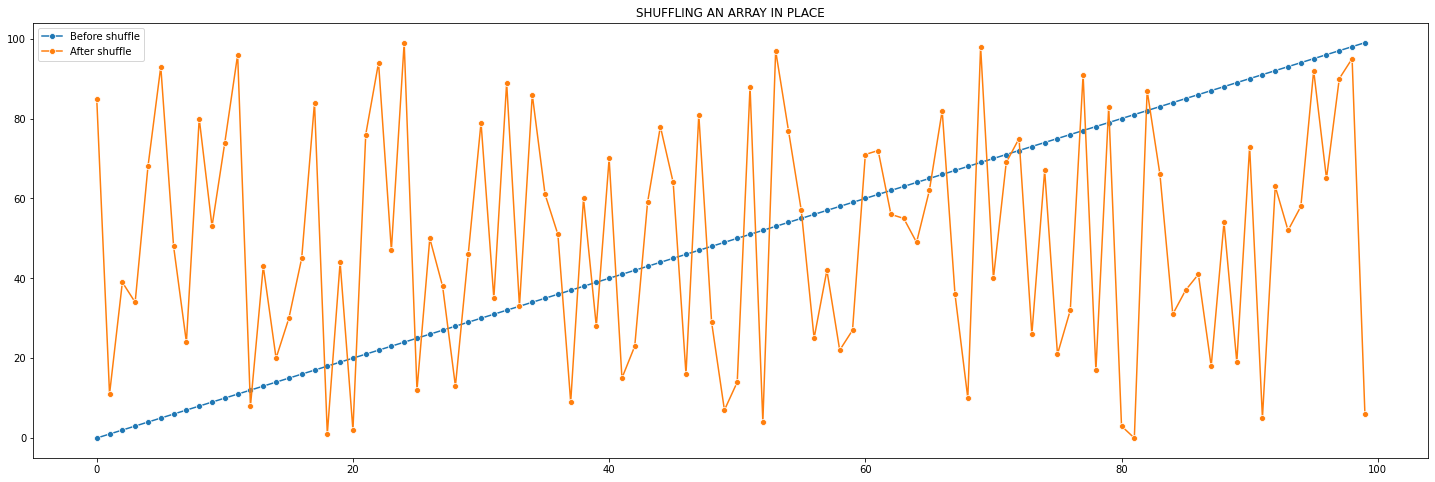

In [25]:
x_sh = np.arange(100)
print ("Array - before shuffle:\n", x_sh, "\n")
fig, axs = plt.subplots(figsize = (25,8))
sns.lineplot(data = x_sh, marker = "o")
rng.shuffle(x_sh)
print ("Array - after shuffle:\n", x_sh, "\n")
sns.lineplot(data = x_sh, marker = "o")
plt.title ("SHUFFLING AN ARRAY IN PLACE")
plt.legend(["Before shuffle","After shuffle"])
plt.show()

[15  8 19  1  6  5  0 13 12 18  4 17 14  2  3 10  7 16 11  9]


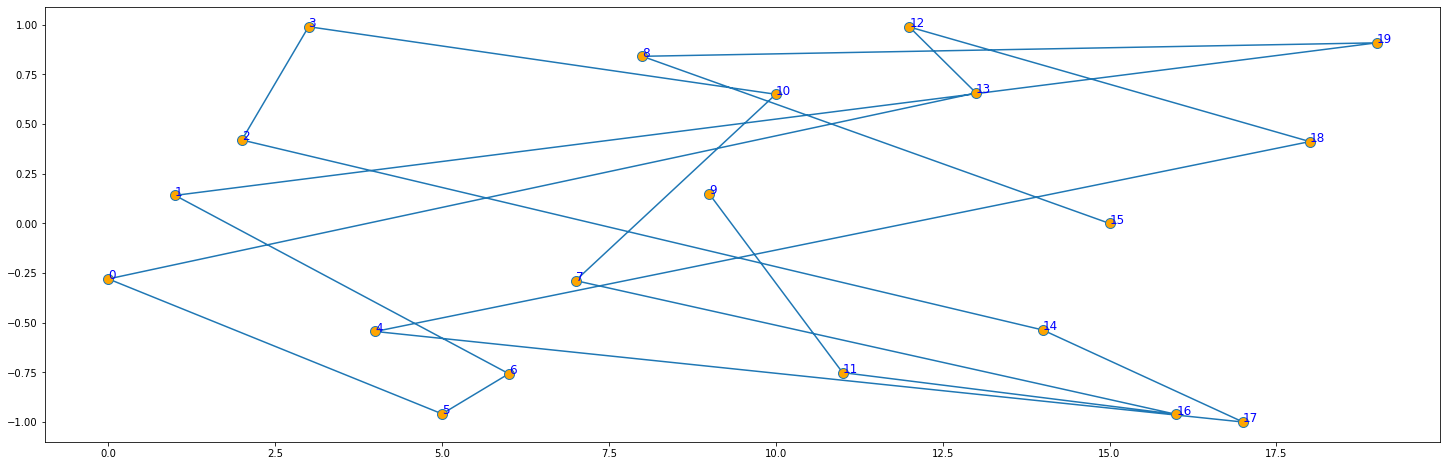

In [26]:
x0_sh=np.arange(20)
y0_sh = np.sin(x0_sh)
rng.shuffle(x0_sh)
print (x0_sh)

fig, axs = plt.subplots(figsize = (25,8))
plt.plot(x0_sh,y0_sh, marker="o", markerfacecolor='orange', markersize=10)
for x, y in zip(x0_sh, y0_sh):
    plt.text(x, y, str(x), color="b", fontsize=12)
plt.show()

***

In [27]:
x1_sh = np.arange(18).reshape((3, 2, 3))
print("Initial Array:\n", x1_sh, "\n")
rng.shuffle(x1_sh, axis = 0)
print("Axis 0 shuffle:\n", x1_sh, "\n")
rng.shuffle(x1_sh, axis = 1)
print("Axis 1 shuffle:\n", x1_sh, "\n")
rng.shuffle(x1_sh, axis = 2)
print("Axis 2 shuffle:\n", x1_sh, "\n")

Initial Array:
 [[[ 0  1  2]
  [ 3  4  5]]

 [[ 6  7  8]
  [ 9 10 11]]

 [[12 13 14]
  [15 16 17]]] 

Axis 0 shuffle:
 [[[12 13 14]
  [15 16 17]]

 [[ 6  7  8]
  [ 9 10 11]]

 [[ 0  1  2]
  [ 3  4  5]]] 

Axis 1 shuffle:
 [[[15 16 17]
  [12 13 14]]

 [[ 9 10 11]
  [ 6  7  8]]

 [[ 3  4  5]
  [ 0  1  2]]] 

Axis 2 shuffle:
 [[[17 16 15]
  [14 13 12]]

 [[11 10  9]
  [ 8  7  6]]

 [[ 5  4  3]
  [ 2  1  0]]] 



***

#### 2.3.2. [**permutation**](https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.permutation.html#numpy.random.Generator.permutation) (x, axis=0) <a id='permutation'></a>

Randomly permutes a sequence, or returns a permuted range. ***x*** defines the element to be permuted. If it is an integer, randomly permute *np.arange(x)*. If *x* is an array, makes a copy and shuffles the elements randomly. ***x*** is he axis which x is shuffled along and it is *0* by default.

EXAMPLES:
***

Array - before shuffle:
 [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95
 96 97 98 99] 

Array - shuffled (copy):
 [63 46 54 74 78 61 23 35 43 62 30  6 99 15 68  7 48 37 22 64 89 59 17  8
 50 75 58 84 66 76 77 36 69 87  2 91 98 44 71 16 97 41 34 57 55 24 65 10
 49 81 12 45 56 42 29 93  9 94 26 88 51 83 13 47 80 18 86 39 96 53 38 20
  0 19 67  1 60 11 25 95 14 70 52 73 33  5 40 85 21 72 31  3 32  4 82 79
 92 28 27 90] 

Array - after shuffle:
 [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95
 96 97 98 99] 



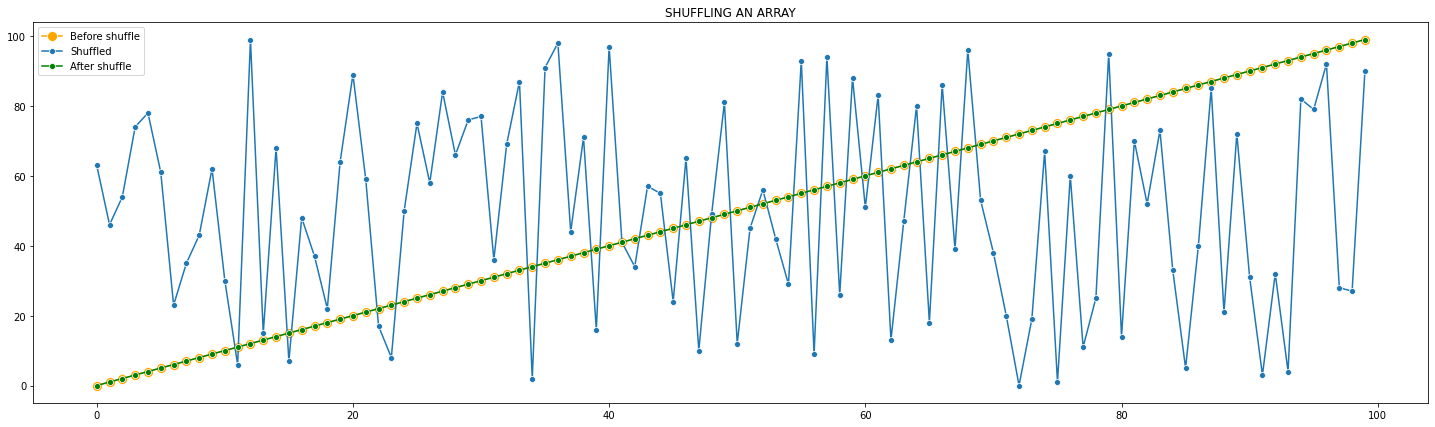

In [28]:
x_per = np.arange(100)
print ("Array - before shuffle:\n", x_per, "\n")
y_per = (rng.permutation(x_per))
print ("Array - shuffled (copy):\n", y_per, "\n")
print ("Array - after shuffle:\n", x_per, "\n")

fig, axs = plt.subplots(figsize = (25,7))
sns.lineplot(data = x_per, marker = "o", markersize=10, color = "orange")
sns.lineplot(data = y_per, marker = "o")
sns.lineplot(data = x_per, marker = "o", color = "g")
plt.title ("SHUFFLING AN ARRAY")
plt.legend(["Before shuffle","Shuffled","After shuffle"])
plt.show()

***

In [29]:
x1_per = (rng.permutation([1, 4, 9, 12, 15]))
print(x1_per)

[15  4 12  1  9]


***

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]


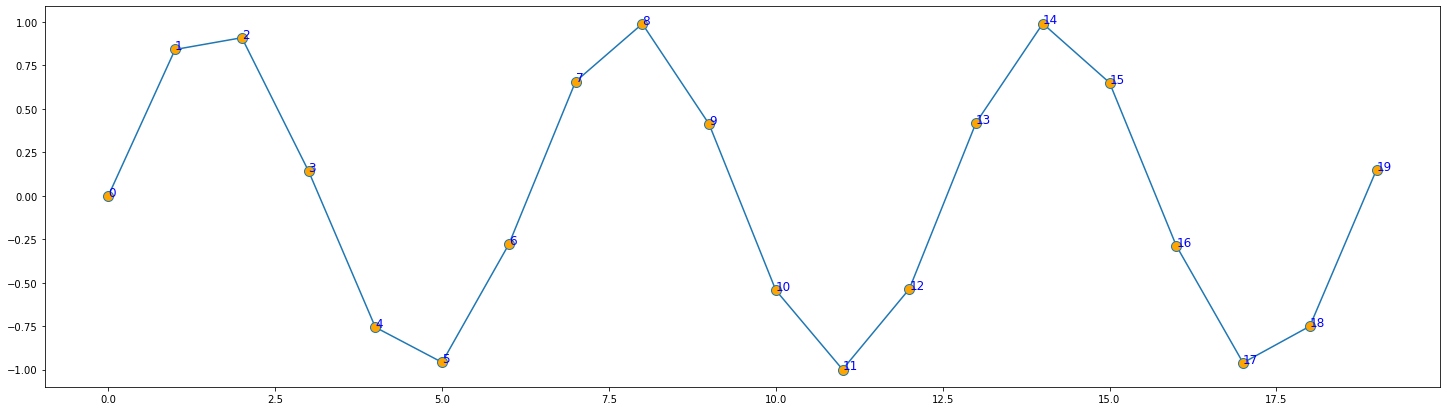

In [30]:
x0_per=np.arange(20)
y0_per = np.sin(x0_per)
rng.permutation(x0_per)
print(x0_per)
fig, axs = plt.subplots(figsize = (25,7))
plt.plot(x0_per,y0_per, marker="o", markerfacecolor='orange', markersize=10)
for x, y in zip(x0_per, y0_per):
    plt.text(x, y, str(x), color="b", fontsize=12)
plt.show()

[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]
 [15 16 17 18 19]
 [20 21 22 23 24]]
[[ 0  1  2  3  4]
 [15 16 17 18 19]
 [ 5  6  7  8  9]
 [10 11 12 13 14]
 [20 21 22 23 24]]
[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]
 [15 16 17 18 19]
 [20 21 22 23 24]]


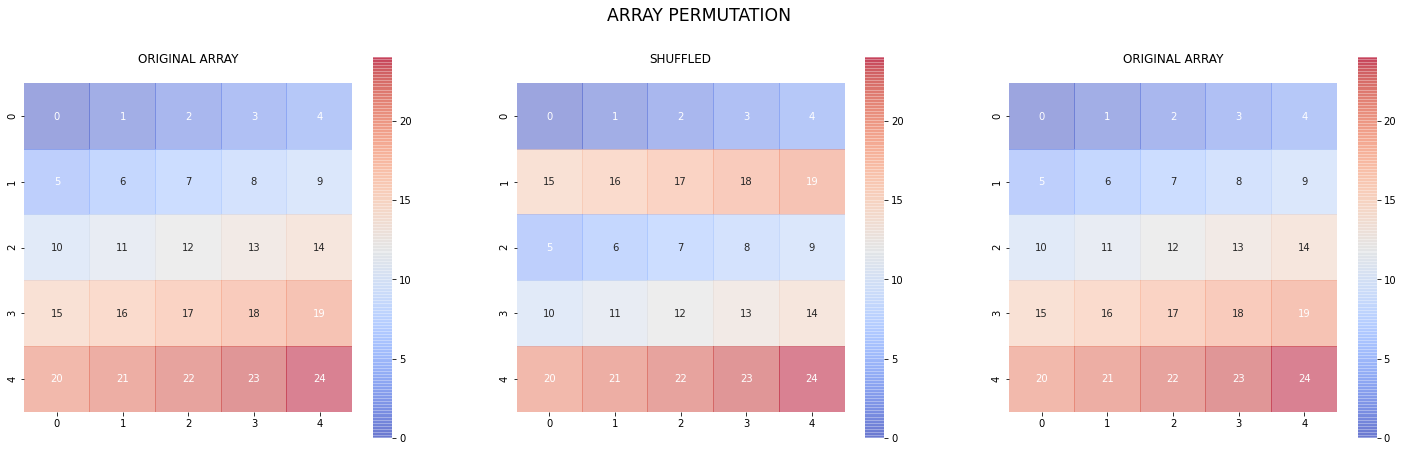

In [31]:
x2_per = (np.arange(25).reshape((5, 5)))
y2_per = (rng.permutation(x2_per))
print (x2_per)
print(y2_per)
print (x2_per)


fig, axs = plt.subplots(1, 3, figsize = (25,7))
fig.suptitle ("ARRAY PERMUTATION", size = "xx-large")
sns.heatmap (data = x2_per, square = True, annot = True, cmap = "coolwarm",
             alpha = 0.5, ax = axs[0]).set_title("ORIGINAL ARRAY\n")
sns.heatmap (data = y2_per, square = True, annot = True, cmap = "coolwarm",
             alpha = 0.5, ax = axs[1]).set_title("SHUFFLED\n")
sns.heatmap (data = x2_per, square = True, annot = True, cmap = "coolwarm",
             alpha = 0.5, ax = axs[2]).set_title("ORIGINAL ARRAY\n")
plt.show()

***

#### 2.3.3. [**permuted**](https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.permuted.html#numpy.random.Generator.permuted) (x, axis=None, out=None) <a id='permuted'></a>

Randomly permute *x* along axis where each slice along the given axis is shuffled independently of the others. ***x*** is an array to be shuffled. ***axis*** defines the axis in which slices of *x* are shuffled. Each slice is shuffled independently of the others. If *axis* is *None*, the flattened array is shuffled. ***out*** defines the destinaton of the shuffled array. If it is *None*, a shuffled copy of the array is returned.

EXAMPLES:
***

In [32]:
x_perd = np.arange(24).reshape(3, 8)
print ("x(before)=\n", x_perd, "\n")
y_perd = rng.permuted(x_perd, axis=1)
print ("y=\n", y_perd, "\n")
print ("x(after)=\n", x_perd, "\n")

x(before)=
 [[ 0  1  2  3  4  5  6  7]
 [ 8  9 10 11 12 13 14 15]
 [16 17 18 19 20 21 22 23]] 

y=
 [[ 0  1  4  2  3  7  5  6]
 [14 12 11 15  8 10 13  9]
 [18 23 17 21 19 20 22 16]] 

x(after)=
 [[ 0  1  2  3  4  5  6  7]
 [ 8  9 10 11 12 13 14 15]
 [16 17 18 19 20 21 22 23]] 



[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]


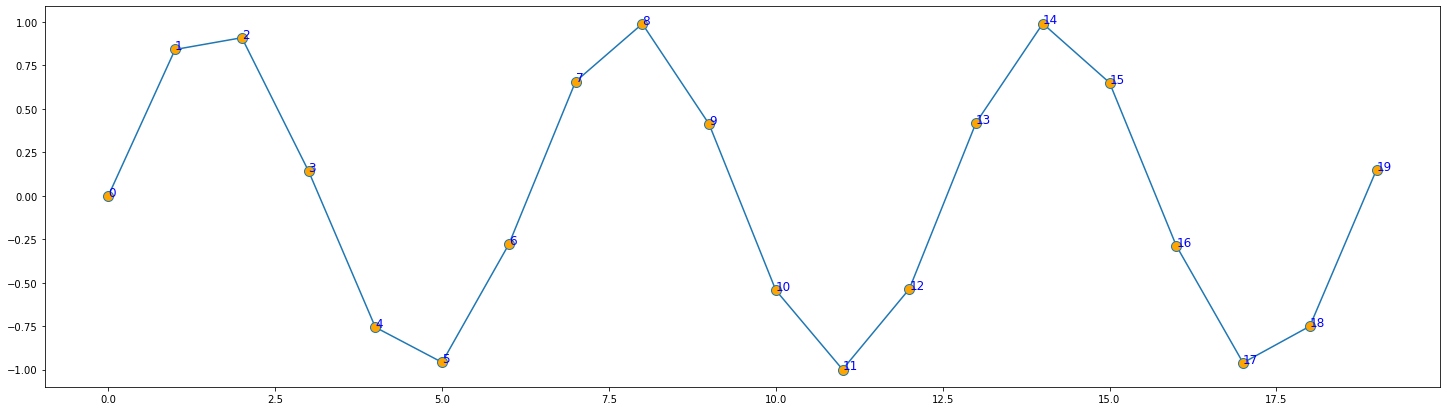

In [33]:
x0_perd=np.arange(20)
y0_perd = np.sin(x0_perd)
rng.permuted(x0_perd)
print(x0_perd)

fig, axs = plt.subplots(figsize = (25,7))
plt.plot(x0_perd,y0_perd, marker="o", markerfacecolor='orange', markersize=10)
for x, y in zip(x0_perd, y0_perd):
    plt.text(x, y, str(x), color="b", fontsize=12)
plt.show()

[ 1 11 17  4 19 18 14 13  2 15  0  5  3  6  9 12 16  8 10  7]


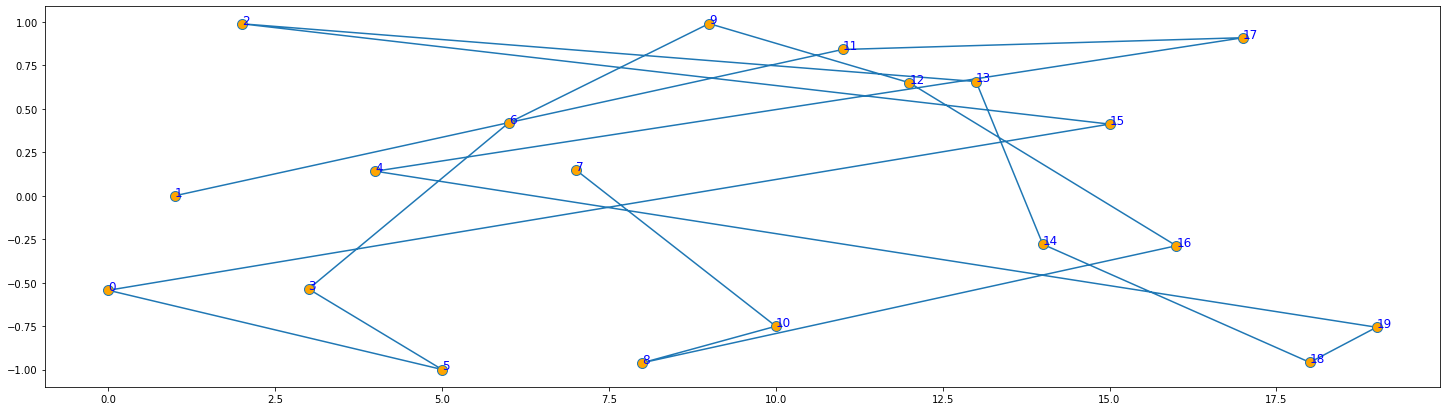

In [34]:
x01_perd=np.arange(20)
y01_perd = np.sin(x01_perd)
rng.permuted(x01_perd, out=x01_perd)
print(x01_perd)
fig, axs = plt.subplots(figsize = (25,7))
plt.plot(x01_perd,y01_perd, marker="o", markerfacecolor='orange', markersize=10)
for x, y in zip(x01_perd, y01_perd):
    plt.text(x, y, str(x), color="b", fontsize=12)
plt.show()

***

x(before)=
 [[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]
 [15 16 17 18 19]
 [20 21 22 23 24]] 

y=
 [[ 0  4  1  2  3]
 [ 6  8  5  9  7]
 [13 12 11 10 14]
 [15 19 18 16 17]
 [24 20 23 21 22]] 

x(after)=
 [[ 0  4  1  2  3]
 [ 6  8  5  9  7]
 [13 12 11 10 14]
 [15 19 18 16 17]
 [24 20 23 21 22]] 



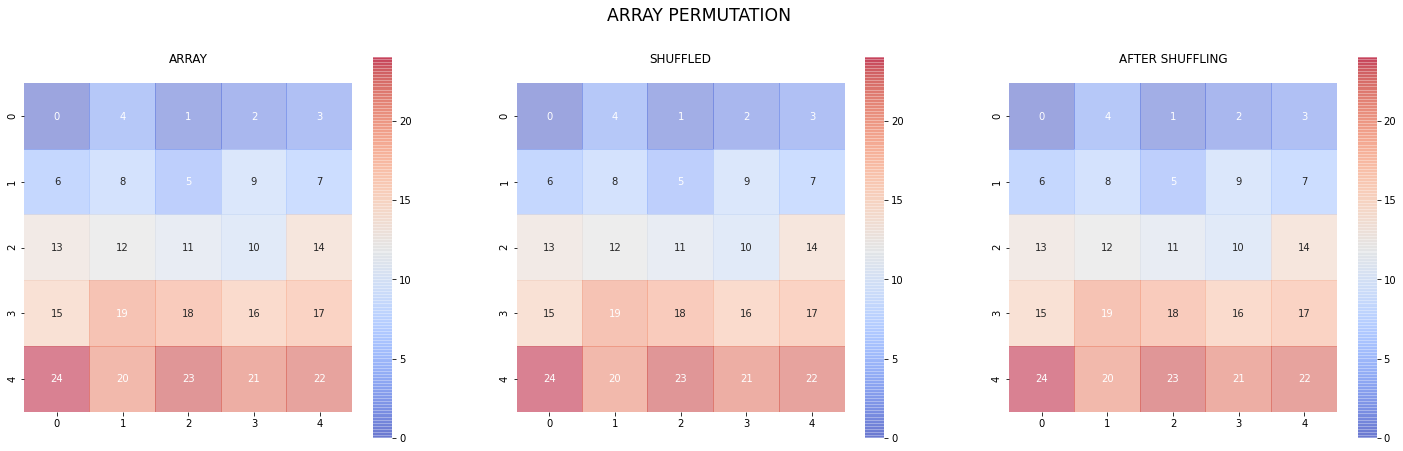

In [35]:
x1_perd = np.arange(25).reshape(5, 5)
print ("x(before)=\n", x1_perd, "\n")
y1_perd = rng.permuted(x1_perd, axis=1, out = x1_perd)
print ("y=\n", y1_perd, "\n")
print ("x(after)=\n", x1_perd, "\n")


fig, axs = plt.subplots(1, 3, figsize = (25,7))
fig.suptitle ("ARRAY PERMUTATION", size = "xx-large")
sns.heatmap (data = x1_perd, square = True, annot = True, cmap = "coolwarm",
             alpha = 0.5, ax = axs[0]).set_title("ARRAY\n")
sns.heatmap (data = y1_perd, square = True, annot = True, cmap = "coolwarm",
             alpha = 0.5, ax = axs[1]).set_title("SHUFFLED\n")
sns.heatmap (data = x1_perd, square = True, annot = True, cmap = "coolwarm",
             alpha = 0.5, ax = axs[2]).set_title("AFTER SHUFFLING\n")
plt.show()

***

### 2.4. DISTRIBUTIONS <a id='DISTRIBUTIONS'></a>

A data distribution is a function or a listing which shows all the possible values (or intervals) of the data. It also tells you how often each value occurs. [19] There are over 20 different types of data distributions (applied to the continuous or the discrete space) commonly used in data science to model various types of phenomena. They also have many interconnections. [20] There are 5 commonly used distributions from Numpy.random package explained below.

Image 3. Distribution relationship
<center><img src="https://miro.medium.com/max/700/1*szMCjXuMDfKu6L9T9c34wg.png" width="700"/></center>

#### 2.4.1. [**uniform**](https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.uniform.html#numpy.random.Generator.uniform) (low=0.0, high=1.0, size=None) <a id='uniform'></a>

A uniform distribution, sometimes also known as a rectangular distribution, is a distribution that has constant probability. [21] This means that all outcomes are equally likely to happen.
Samples are uniformly distributed over the half-open interval. ***low*** is the starting point of the interval and is included. All generated values are greater than or equal to low. The default value is 0. ***high*** is the ending point of the interval and it is excluded. All generated values are less than high. The difference between *high* and *low* (*high - low*) must be non-negative. The default value is 1.0. ***size*** defines the shape of the output.

***

EXAMPLES
***

[2.6278885  0.40317477 4.07717155 ... 3.33408782 4.83187862 1.15924402]


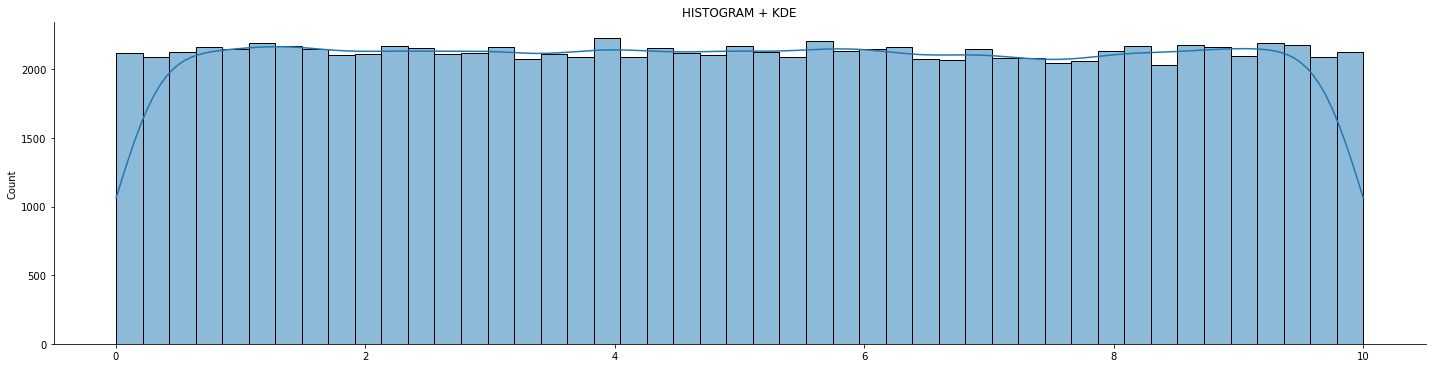

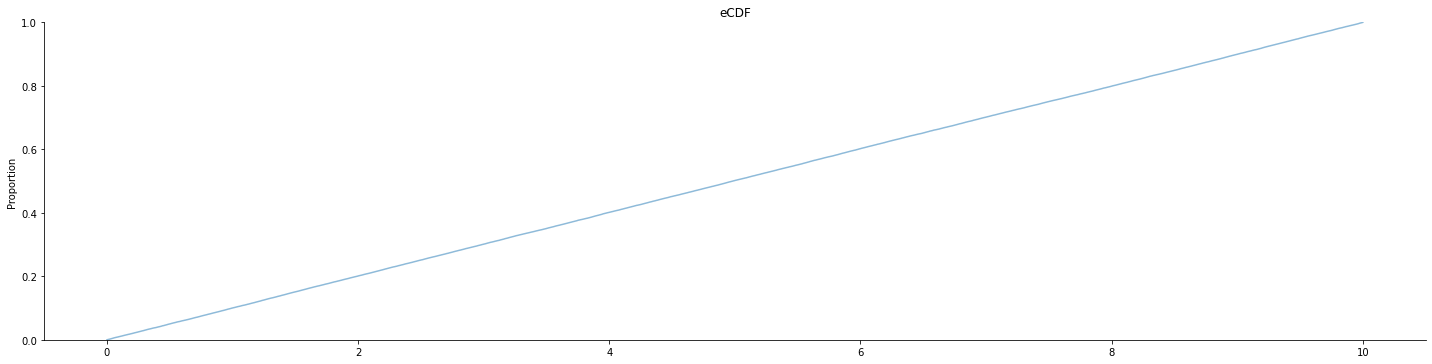

In [36]:
s_uni = np.random.default_rng().uniform(0,10, 100000)
print (s_uni)

sns.displot (s_uni, height=5, aspect=20/5, alpha = 0.5, kde = True)
plt.title("HISTOGRAM + KDE")
plt.show()
print("\n\n")
sns.displot (s_uni, height=5, aspect=20/5, alpha = 0.5, kind = "ecdf")
plt.title("eCDF")
plt.show()

***

#### 2.4.2. [**normal**](https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.normal.html#numpy.random.Generator.normal) (loc=0.0, scale=1.0, size=None) <a id='normal'></a>

Normal distribution, also known as the Gaussian distribution, is a probability distribution that is symmetric about the mean, showing that data near the mean are more frequent in occurrence than data far from the mean. In graph form, normal distribution will appear as a bell curve. [22] ***loc*** defines the mean (centre) and ***scale*** is the standard deviation (spread or width) of the distribution. ***size*** is the shape of the output.

EXAMPLES
***

[-7.6315407   2.01890183 -3.39895801 ... 13.23652676 13.27785877
  5.15617901]


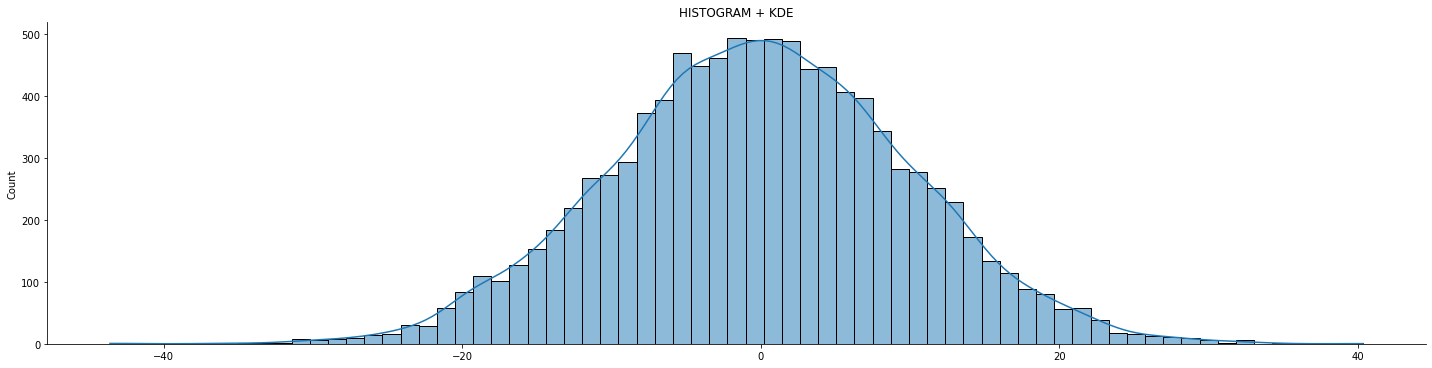

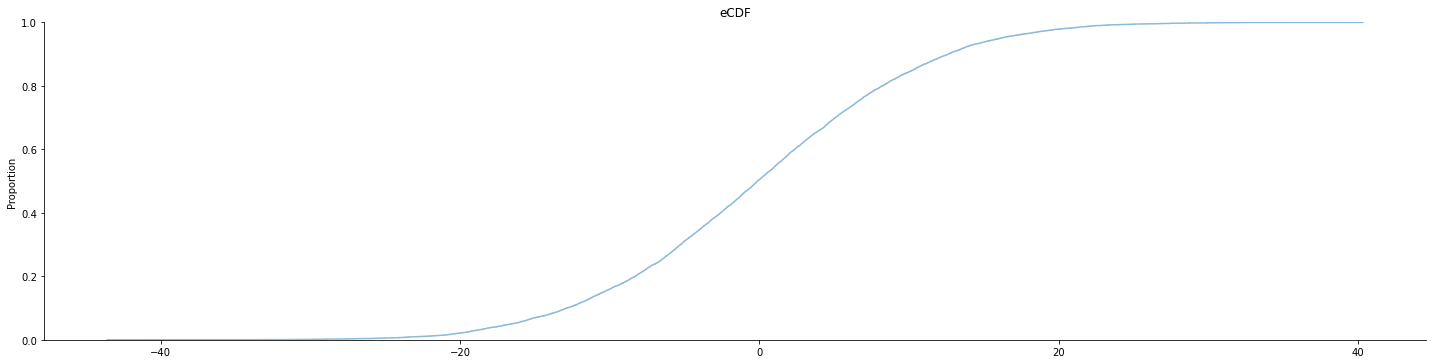

In [37]:
s_norm = np.random.default_rng().normal(0, 10, 10000)
print(s_norm)

sns.displot (s_norm, height=5, aspect=20/5, alpha = 0.5, kde = True)
plt.title("HISTOGRAM + KDE")
plt.show()
print("\n\n")
sns.displot (s_norm, height=5, aspect=20/5, alpha = 0.5, kind = "ecdf")
plt.title("eCDF")
plt.show()

***

#### 2.4.3. [**binomal**](https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.binomial.html#numpy.random.Generator.binomial) (n, p, size=None) <a id='binomal'></a>

A binomial distribution can be thought of as simply the probability of a success or failure outcome in an experiment or survey that is repeated multiple times. The binomial is a type of distribution that has two possible outcomes. [23] ***n*** is an integer>= 0 that defines the number of trials. Floats are also accepted, but they get truncated to integers. ***p*** is the probability of each trial and is in range >= 0 and <=1. If multiple *p*-s are defines, the sum of all has to be 1. The output shape is defined by ***size***.

EXAMPLES
***

[491 471 492 ... 498 489 506]


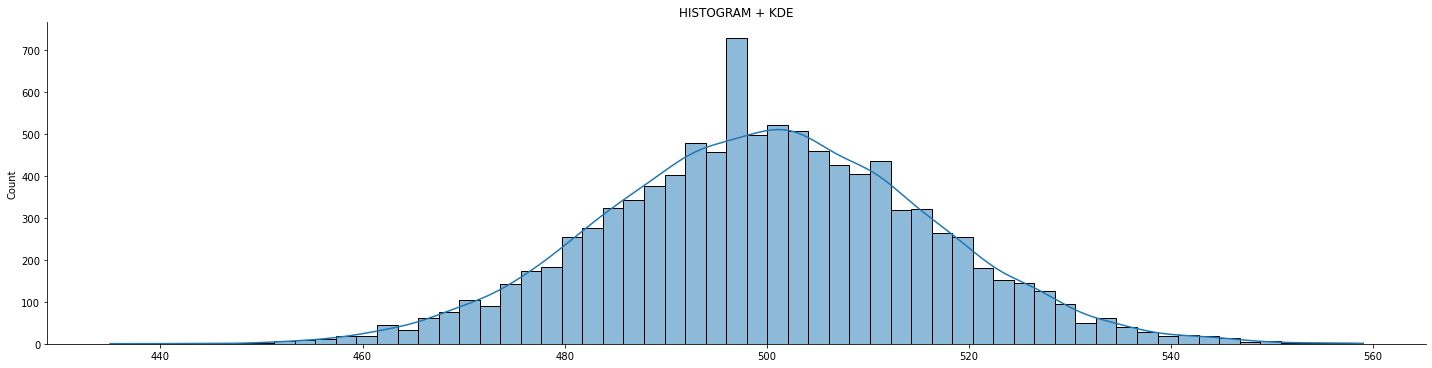

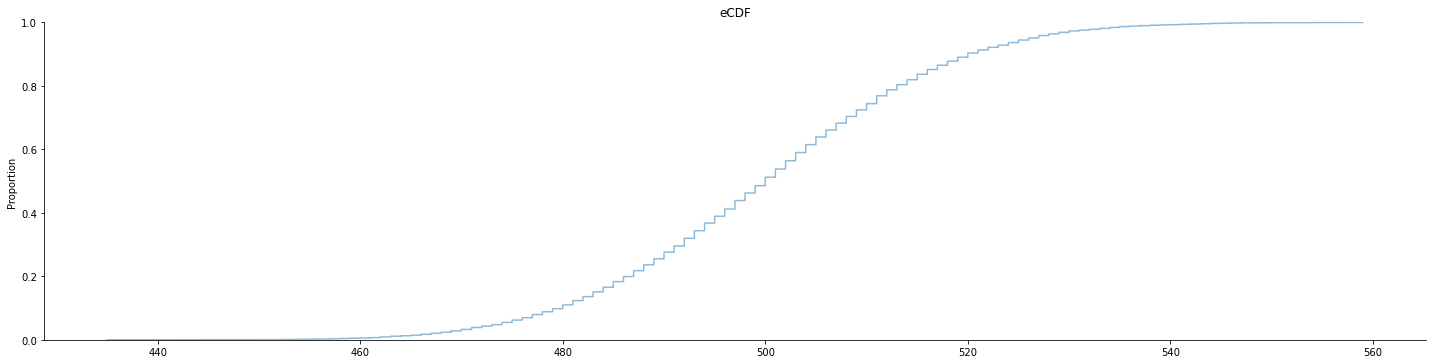

In [38]:
s_bi = rng.binomial(1000, 0.5, 10000)
print (s_bi)

sns.displot (s_bi, height=5, aspect=20/5, alpha = 0.5, kde = True)
plt.title("HISTOGRAM + KDE")
plt.show()
print("\n\n")
sns.displot (s_bi, height=5, aspect=20/5, alpha = 0.5, kind = "ecdf")
plt.title("eCDF")
plt.show()

***

#### 2.4.4. [**hypergeometric**](https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.hypergeometric.html#numpy.random.Generator.hypergeometric) (ngood, nbad, nsample, size=None) <a id='hypergeometric'></a>

Hypergeometric distribution is a distribution function in which selections are made from two groups without replacing members of the groups. The hypergeometric distribution differs from the binomial distribution in the lack of replacements. [24] ***ngood*** represents the ways to make a good selection, ***nbad*** represents ways to make a bad selection. They both can't be negative. ***nsample*** is the number of items sampled, and is less than or equal to the sum *ngood* + *nbad*. ***size*** is the output shape.

EXAMPLES
***

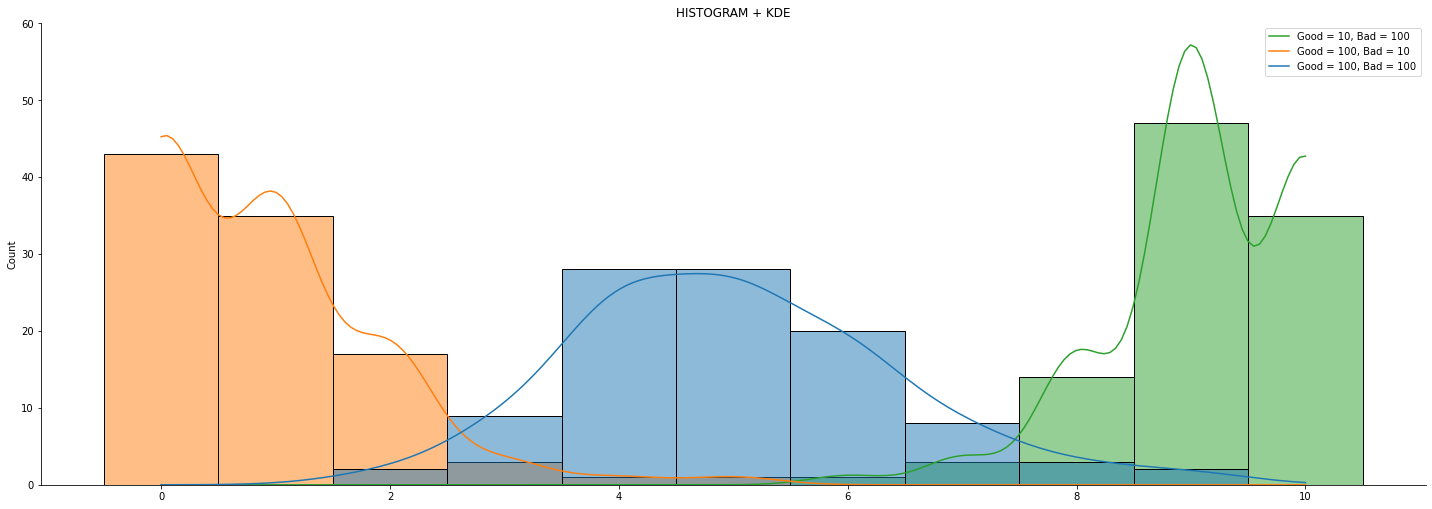

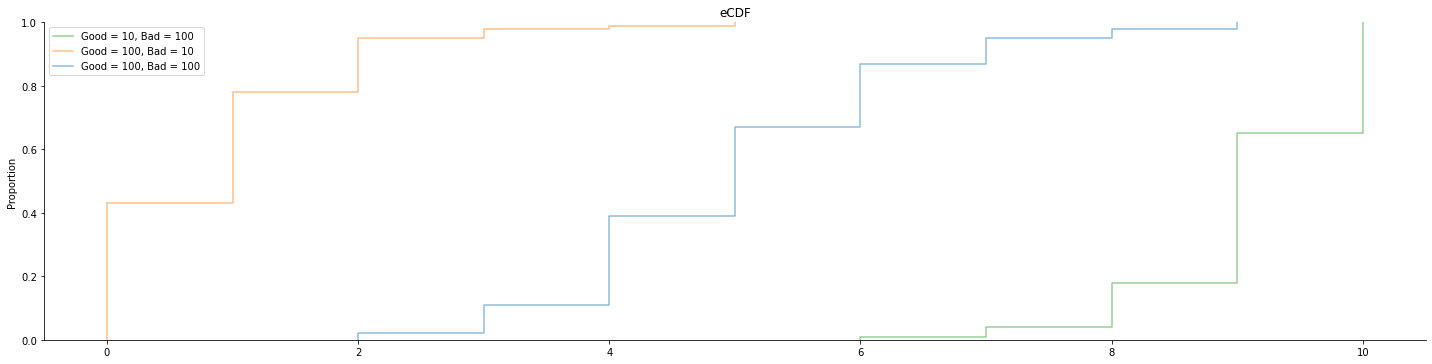

In [39]:
s_hype = (rng.hypergeometric(100, 100, 10, 100))
s1_hype = (rng.hypergeometric(10, 100, 10, 100))
s2_hype = (rng.hypergeometric(100, 10, 10, 100))

sns.displot ([s_hype, s1_hype, s2_hype], height=7, aspect=20/7, alpha = 0.5, kde = True, discrete = True, legend = False)
plt.title("HISTOGRAM + KDE")
plt.legend(["Good = 10, Bad = 100", "Good = 100, Bad = 10", "Good = 100, Bad = 100"])
plt.show()
print("\n\n")
sns.displot ([s_hype, s1_hype, s2_hype], height=5, aspect=20/5, alpha = 0.5, kind = "ecdf", legend = False)
plt.title("eCDF")
plt.legend(["Good = 10, Bad = 100", "Good = 100, Bad = 10", "Good = 100, Bad = 100"])
plt.show()

***

#### 2.4.5. [**poisson**](https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.poisson.html#numpy.random.Generator.poisson) (lam=1.0, size=None) <a id='poisson'></a>

Poisson distribution is a probability distribution that is used to show how many times an event is likely to occur over a specified period. In other words, it is a count distribution. [25] ***lam*** (lambda) is the txpected number of events occurring in a fixed-time interval and it must be >= 0. ***size*** defines the output shape. *lam* sequence must be broadcastable over the requested *size*.

EXAMPLES
***

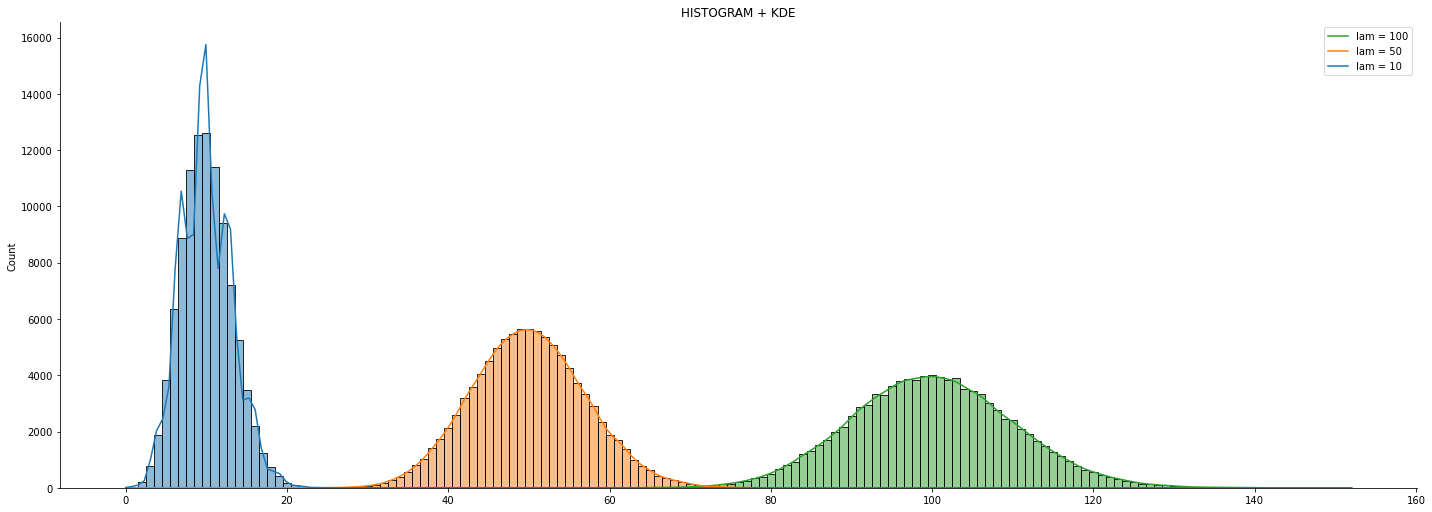

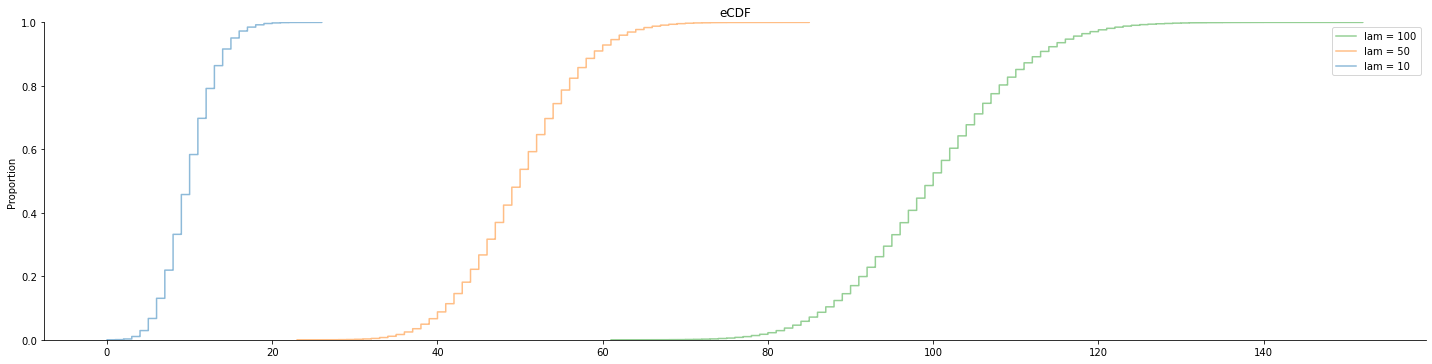

In [40]:
s_poi = (rng.poisson(10, 100000))
s1_poi = (rng.poisson(50, 100000))
s2_poi = (rng.poisson(100, 100000))

#plt.style.use('ggplot')

sns.displot ([s_poi, s1_poi, s2_poi], height=7, aspect=20/7, alpha = 0.5, kde = True, discrete = True, legend = False)
plt.title("HISTOGRAM + KDE")
plt.legend(["lam = 100", "lam = 50", "lam = 10"])
plt.show()
print("\n\n")
sns.displot ([s_poi, s1_poi, s2_poi], height=5, aspect=20/5, alpha = 0.5, kind = "ecdf", legend = False)
plt.title("eCDF")
plt.legend(["lam = 100", "lam = 50", "lam = 10"])
plt.show()

## 3. FOR FUN <a id='FOR_FUN'></a>
<hr style="border:2px solid gray"> </hr>

#### ROLLING A DICE
***
<left><img src="http://www.cs.unc.edu/Courses/comp101-f16/labs/lab18/dice.png" width="170"/></left> 

In [42]:
repeat = True
while repeat:
    print("You rolled",rng.integers(7))
    print("Do you want to roll again? Y/N")
    repeat = "Y" in input()

You rolled 5
Do you want to roll again? Y/N


 n


***

#### ROCK, PAPER, SCISSORS
***
<left><img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSccXt-YP6KyXXBPsZoXIQqciP_ORccLiFB1LtKjud4WsV66snhFgyAvqipHIqSHsb1XVg&usqp=CAU" width="300"/></left> 

In [43]:
user_action = input("Enter a choice (rock, paper, scissors): ")
possible_actions = ["rock", "paper", "scissors"]
computer_action = rng.choice(possible_actions)
print(f"\nYou chose {user_action}, computer chose {computer_action}.\n")

if user_action == computer_action:
    print(f"Both players selected {user_action}. It's a tie!")
elif user_action == "rock":
    if computer_action == "scissors":
        print("Rock smashes scissors! You win!")
    else:
        print("Paper covers rock! You lose.")
elif user_action == "paper":
    if computer_action == "rock":
        print("Paper covers rock! You win!")
    else:
        print("Scissors cuts paper! You lose.")
elif user_action == "scissors":
    if computer_action == "paper":
        print("Scissors cuts paper! You win!")
    else:
        print("Rock smashes scissors! You lose.")

Enter a choice (rock, paper, scissors):  n



You chose n, computer chose scissors.



***

#### PLOT ART
***

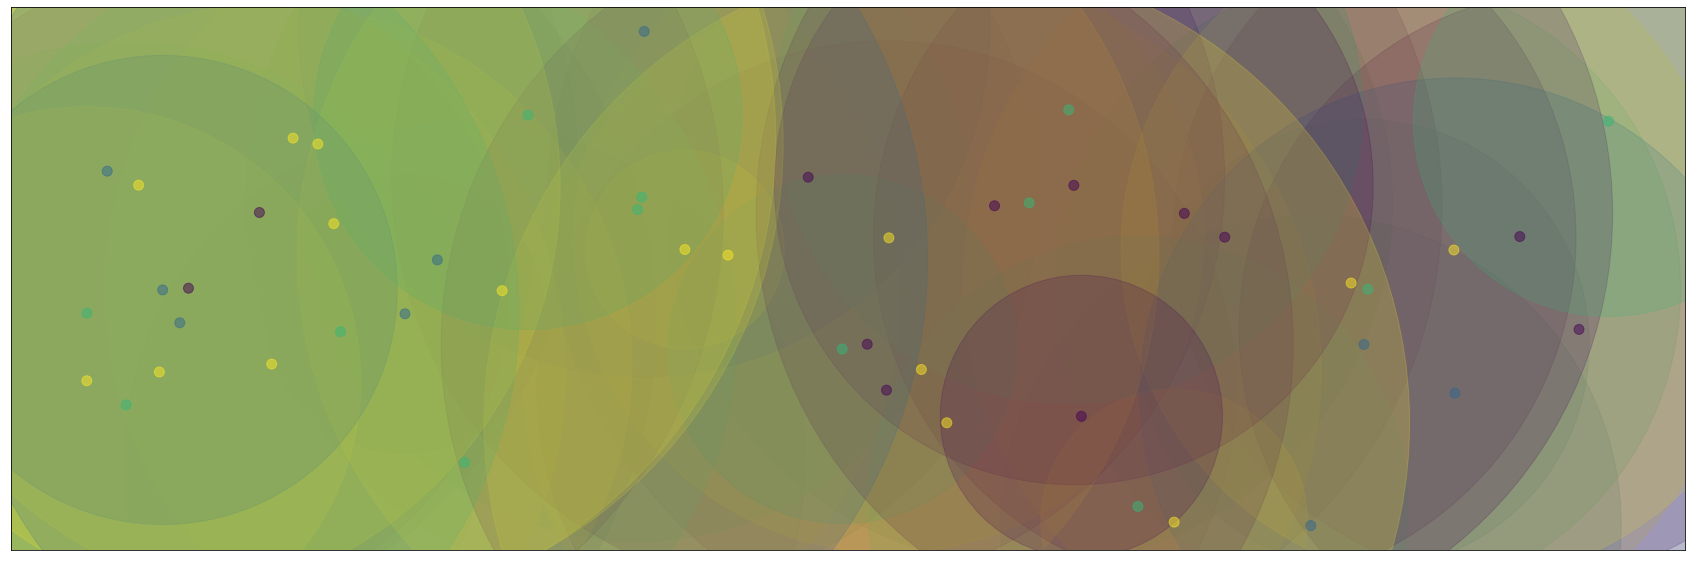

In [93]:
no_of_balls = 50
a = [rng.random() for i in range(no_of_balls)]
b = [np.random.default_rng().normal(0.5, 0.25) for i in range(no_of_balls)]
colors = [rng.integers(1, 5) for i in range(no_of_balls)]
areas = [rng.integers(1000000) for i in range(no_of_balls)]

plt.scatter(a, b, s=areas, c=colors, alpha=0.2)
plt.scatter (a,b, c=colors, alpha = 0.5, s = 100)
plt.xticks([])
plt.yticks([])
fig = plt.gcf()
fig.set_size_inches(30, 10)
plt.show()

***

## 4. REFERENCES
<hr style="border:2px solid gray"> </hr>

### MAIN

- [1] https://towardsdatascience.com/getting-started-with-numpy-59b22df56729
- [2] https://python.plainenglish.io/what-are-basics-of-numpy-2afa9a9455cb
- [3] https://www.w3schools.com/python/numpy/numpy_intro.asp
- [4] https://en.wikipedia.org/wiki/Matplotlib
- [5] https://www.section.io/engineering-education/seaborn-tutorial/
- [6] https://www.javatpoint.com/numpy-random
- [7] https://www.w3schools.com/python/numpy/numpy_random.asp
- [8] https://pythonguides.com/python-numpy-random/
- [9] https://en.wikipedia.org/wiki/Random_seed
- [10] https://www.researchgate.net/post/Can-someone-explain-what-is-seed-in-generating-a-random-number
- [11] https://www.computerhope.com/jargon/s/seed.htm
- [12] https://numpy.org/doc/stable/reference/random/index.html
- [13] https://en.wikipedia.org/wiki/Mersenne_Twister
- [14] https://hackage.haskell.org/package/pcg-random
- [15] https://numpy.org/doc/stable/reference/random/bit_generators/pcg64.html
- [16] https://corporatefinanceinstitute.com/resources/knowledge/other/uniform-distribution/
- [17] https://numpy.org/doc/stable/reference/random/generator
- [18] https://www.geeksforgeeks.org/subarraysubstring-vs-subsequence-and-programs-to-generate-them/
- [19] https://www.statisticshowto.com/data-distribution/
- [20] https://www.kdnuggets.com/2020/06/overview-data-distributions.html
- [21] https://mathworld.wolfram.com/UniformDistribution.html
- [22] https://www.investopedia.com/terms/n/normaldistribution.asp
- [23] https://www.statisticshowto.com/probability-and-statistics/binomial-theorem/binomial-distribution-formula/
- [24] https://www.britannica.com/topic/hypergeometric-distribution
- [25] https://www.investopedia.com/terms/p/poisson-distribution.asp





### IMAGES
- NumPy Logo - https://upload.wikimedia.org/wikipedia/commons/3/31/NumPy_logo_2020.svg
- Array shape - https://i.stack.imgur.com/NWTQH.png
- Difference between PCG and MT (ss) - https://www.pcg-random.org/index.html
- Axes - https://i.stack.imgur.com/dcoE3.jpg
- Distribution relationship - https://miro.medium.com/max/700/1*szMCjXuMDfKu6L9T9c34wg.png

### OTHER

- Jupyter Markdown:
    - https://www.ibm.com/docs/en/db2-event-store/2.0.0?topic=notebooks-markdown-jupyter-cheatsheet
    - https://stackoverflow.com/questions/41375023/how-to-increase-the-width-of-the-horizontal-line-using-markdown-git-hub
- 3D Interactive Plotting - https://www.geeksforgeeks.org/make-3d-interactive-matplotlib-plot-in-jupyter-notebook/
- sin plot: 
    - https://stackoverflow.com/questions/51000491/plot-shuffled-array-numpy
    - https://stackoverflow.com/questions/19633336/using-numbers-as-matplotlib-plot-markers
- Remove ticks in plot - https://stackoverflow.com/questions/37039685/hide-tick-label-values-but-keep-axis-labels

In [44]:
import matplotlib
list = []
for name, hex in matplotlib.colors.cnames.items():
    list.append (name)
    #print(list)
    random_color1 = rng.choice (list)
    random_color2 = rng.choice (list)
print (random_color1, random_color2)

snow moccasin
